$\bold{Task}$ $\bold{2}$

In [ ]:
!pip install tsfel
!pip install pandas
!pip install numpy
!pip install sci-kit learn
!pip install matplotlib
!pip install tsfel
import pandas as pd
import numpy as np
import tsfel
from itertools import product
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt

ERROR: Could not find a version that satisfies the requirement sci-kit (from versions: none)
ERROR: No matching distribution found for sci-kit


The below code loads the dataset created from the MakeDataset.py file. The train and test datasets are 3D matrices which consist of a 3 x 500 time seried data matrix with each column corresponding to the acceleration vector corresponding to a direction in the coordinate axis.

In [2]:
X_train = np.array(np.load("../X_train.npy"))
X_test = np.array(np.load("../X_test.npy"))
Y_train = np.array(np.load("../Y_train.npy"))
Y_test = np.array(np.load("../Y_test.npy"))

The Functions given below are functions that used across all three models

<hr>

**Function:** `decision_tree_training`

Trains a decision tree classifier using the sklearn impementation of a Decision Tree Classifier and returns the tree.

**Parameters:**
- `dataframeX` (`pd.DataFrame`): The feature data for training.
- `dataframeY` (`pd.Series`): The target labels for training.
- `depth` (`int`): The maximum depth of the tree. Default is `None`.
- `random_state` (`int`): Random seed for reproducibility of the decision tree. Default is `2`.

**Returns:**
- `clf` (`DecisionTreeClassifier`): The trained decision tree classifier.
<br>
<hr>

**Function**: `metrics`

Calculates the value of Accuracy, Precision, Recall and the Confusion Matrix by comparing the actual labels with the predicted labels from the decision tree. The function prints the values when the metrics are being calculated for the test dataset (cond == True). For the Confusion Matrix, each row and column corresponding to an activity, and the activites are represented as integers. The legend is :

1. WALKING<br>
2. WALKING_UPSTAIRS<br>
3. WALKING_DOWNSTAIRS<br>
4. SITTING<br>
5. STANDING<br>
6. LAYING<br>

Additionally, the function returns the accuracy, so that it can be used to plot the model depth vs accuracy plot.

**Parameters:**
- `y_pred` (`array-like`): Predicted labels.
- `y_test` (`array-like`): Actual labels.
- `cond` (`boolean`): If `True`(when predicting on the test set), prints metrics and confusion matrix. If `False`, just returns the accuracy value (when calculating the accuracy of the decision tree on the training data).

**Returns:**
- `accuracy` (`float`): The accuracy of the predictions.
<br>
<hr>

**Function**: `decision_Tree_predict`

Generates predictions from a trained decision tree classifier on the given test dataset using the inbuilt sklearn function on the trained decision tree.

**Parameters:**
- `clf` (`DecisionTreeClassifier`): A trained decision tree classifier.
- `test_data_x` (`pandas DataFrame`): The test data for which predictions are made.

**Returns:**
- `y_pred` (`array-like (np array)`): Array of predicted labels.
<br>
<hr>


**Function**: `selected_featurizer`

Selects features from the input data based on correlation, removing one feature from pairs with a correlation above a specified threshold. The reasoning behind this is that, if two features are highly correlated (negetively or positively), then the information gain from splitting on one feature would be vaguely correspondent to splitting on the other column, so we remove this column to decrease computation ( and maybe decrease the depth of the tree by ensuring it does not split on similar attributes twice)

**Parameters:**
- `dataframeX` (`pandas DataFrame`): The feature data from which to select.

**Returns:**
- `selected_features` (`list`): List of selected features.
<br>
<hr>

**Function**: `decision_Tree_plot`

Plots the decision tree and prints the evaluation metrics.

**Parameters:**
- `clf` (`DecisionTreeClassifier`): A trained decision tree classifier.
- `y_pred` (`array-like`): Predicted labels.
- `y_test` (`array-like`): Actual labels.
- `features` (`array`): List of feature names.

**Returns:**
- `acc` (`float`): The accuracy of the model.
<br>
<hr>

**Function**: `bias_variance_plotter`

Plots the accuracy vs. depth for both training and test sets for given decision tree classifier model of varying depths.

**Parameters:**
- `accuracy_dataframe` (`pandas DataFrame`): A dataframe containing depth, train accuracy, and test accuracy.

**Returns:**
- Retuns nothing but displays the plot
<br>
<hr>

In [3]:
def decision_tree_training(dataframeX,dataframeY,depth = None,random_state= 2):
    clf = tree.DecisionTreeClassifier(max_depth = depth,random_state=random_state)
    clf = clf.fit(dataframeX, dataframeY)
    return clf

def metrics(y_pred, y_test, cond = False):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    labels = [1,2,3,4,5,6]
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    if cond == True:
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"Precision: {precision:.4f}")
        print("\nConfusion Matrix:\n")
        print(cm_df)

    return accuracy,cm

def decision_Tree_predict(clf,test_data_x):
    y_pred = clf.predict(test_data_x)
    y_pred = np.array(y_pred)
    return y_pred


def decision_Tree_plot(clf,y_pred,y_test,features):
    
    plt.figure(figsize=(20, 10))
    tree.plot_tree(clf, filled=True, feature_names=features)
    plt.title('Decision Tree Visualization')
    plt.show()
    acc,cm = metrics(y_pred,y_test,cond=True)
    return acc,cm

def selected_featurizer(dataframeX):
        correlation_matrix = dataframeX.corr()
        threshold = 0.98
        removals = []

        pairs = product(range(len(correlation_matrix.columns)), repeat=2)

        for i, j in pairs:
            if i > j:
                correlation_value = correlation_matrix.iloc[i, j]
                if abs(correlation_value) > threshold and correlation_value != 1:
                    colname_i = correlation_matrix.columns[i]
                    colname_j = correlation_matrix.columns[j]
                    if colname_i not in removals and colname_j not in removals:
                        removals.append(colname_i)

        selected_features = [col for col in dataframeX.columns if col not in removals]

        return selected_features

def bias_variance_plotter(accuracy_dataframe):
    plt.figure(figsize=(10, 6))
    
    plt.plot(accuracy_dataframe['Depth'], accuracy_dataframe['Train Accuracy'], 
             marker='o', label='Train Accuracy', color='blue')
    
    plt.plot(accuracy_dataframe['Depth'], accuracy_dataframe['Test Accuracy'], 
             marker='o', label='Test Accuracy', color='orange')
    
    plt.title('Accuracy vs. Depth')
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

<hr>

**Function:** `decision_tree_raw`:

**Idea:** The idea of this function is that every data point of each subject is convertedinto a feature of a dataframe (total 1500 features). The decision tree is then trained on this data.

**Parameters:**
- `X_test` (`pandas dataframe`) : The dataset of features on which the decision tree classifier will be tested
- `X_train` (`pandas dataframe`) : The dataset of features on which the decision tree classifier will be trained
- `y_test` (`pandas dataframe`) : The dataset of actual values on which the decision tree classifier will be tested by comparing the predictions
- `y_train` (`pandas dataframe`) : The dataset of actual values on which the decision tree classifier will be trained
- `Depth` (`integer`) : Depth of the Decision tree

**What the function does:**

- *Extracting the accelerometer data* : The acceleration vector data points across each time series are extracted from the dataset and made into a row of feature points of a pandas dataframe where each row is 1500 long (one feature for each data point).

- *Training* : The pandas dataframe and output is fed into the decision tree classifier, to learn a decision tree of a given depth

- *Prediction* : The testing dataframe is then passed into the decision tree and a prediction is given for each vector. We then take the mode of 500 activities to get the final prediction for the activity of the given time series.

**Returns:**

- Accuracy of the decision tree on the test set and the train set

<hr>

In [4]:
def decision_tree_raw(X_test,X_train,y_test,y_train,depth):
    flattened_X_train = []
    for sample in X_train:
        flattened_sample = []
        for item in sample:
            for j in item:
                flattened_sample.append(j)
        flattened_X_train.append(flattened_sample)
    
    flattened_X_test = []
    for sample in X_test:
        flattened_sample = []
        for item in sample:
            for j in item:
                flattened_sample.append(j)
        flattened_X_test.append(flattened_sample)
    
    dataframe_train  = pd.DataFrame(flattened_X_train)
    dataframe_test  = pd.DataFrame(flattened_X_test)
    clf = decision_tree_training(dataframe_train,y_train,depth)
    y_pred = decision_Tree_predict(clf,dataframe_test)
    y_pred = np.array(y_pred)
    
    acc_test,cm = decision_Tree_plot(clf,y_pred,y_test,[f'acc_{axis}_{i}' for i in range(1, 501) for axis in 'xyz'])
   
    y_testing = decision_Tree_predict(clf,dataframe_train)
    acc_train,cm_train = metrics(y_testing,y_train)

    return acc_test,acc_train,cm


<hr>

**Function:** `decision_tree_raw2`:

**Idea:** The idea of this function is that each activity has some specific vectors associated with it, for example, a vector pointing upwards is only possible in activity like walking and a higher degree of upward is only possible only if the activity is walking upward. the idea is to map each time series vector with an activity and train the model on this dataset. Then we pass in the test data vector by vector, nd then figure out the activity by taking the mode over a set of the predictions (500).

**Parameters:**
- `X_test` (`pandas dataframe`) : The dataset of features on which the decision tree classifier will be tested
- `X_train` (`pandas dataframe`) : The dataset of features on which the decision tree classifier will be trained
- `y_test` (`pandas dataframe`) : The dataset of actual values on which the decision tree classifier will be tested by comparing the predictions
- `y_train` (`pandas dataframe`) : The dataset of actual values on which the decision tree classifier will be trained
- `Depth` (`integer`) : Depth of the Decision tree

**What the function does:**

- *Extracting the accelerometer data* : The acceleration vectors across each coordinte axis (X,Y and Z) are extracted from the dataset and made into features of a pandas dataframe where each row is a vector. the output for each timeseries is broadcasted 500 times and attached to the output of each of the individual 500 vectors of the timesereis of the dataframe

- *Training* : The pandas dataframe and output is fed into the decision tree classifier, to learn a decision tree of a given depth

- *Prediction* : The testing dataframe is then passed into the decision tree and a prediction is given for each vector. We then take the mode of 500 activities to get the final prediction for the activity of the given time series.

**Returns:**

- Accuracy of the decision tree on the test set and the train set

<hr>

In [5]:
def decision_tree_raw2(X_test,X_train,y_test,y_train,depth):
    accx = []
    accy =[]
    accz = []
    output = []
 
    for i in range(len(X_train)):
        for j in X_train[i]:
            accx.append(j[0])
            accy.append(j[1])
            accz.append(j[2])
            output.append(y_train[i])
    
    flattened_X_train = []

    for sample in X_train:
        for item in sample:
            flattened_X_train.append(item)

    flattened_X_test = []

    for sample in X_test:
        for item in sample:
            flattened_X_test.append(item)

    Xtrain_dataframe = pd.DataFrame(flattened_X_train, columns=['accx', 'accy', 'accz'])
    Xtest_dataframe = pd.DataFrame(flattened_X_test, columns=['accx', 'accy', 'accz'])
    ytrainout = pd.Series(np.repeat(y_train, 500))
    clf = decision_tree_training(Xtrain_dataframe,ytrainout,depth)

    y_pred = decision_Tree_predict(clf,Xtest_dataframe)
    y_pred = np.array(y_pred)  
    num_rows = int(len(y_pred)/500)
    y_pred_reshaped = y_pred.reshape(num_rows, 500)
    modes = []
    for row in y_pred_reshaped:
        mode = pd.Series(row).mode()
        modes.append(mode.iloc[0])
    aggr_y_pred = np.array(modes)
    acc_test,cm = decision_Tree_plot(clf,aggr_y_pred,y_test,['Acceleration X','Acceleration Y','Acceleration Z'])


    y_pred2 = decision_Tree_predict(clf,Xtrain_dataframe)
    num_rows2 = int(len(y_pred2)/500)
    y_pred_reshaped2 = y_pred2.reshape(num_rows2, 500)
    modes2 = []
    for row in y_pred_reshaped2:
        mode2 = pd.Series(row).mode()
        modes2.append(mode2.iloc[0])
    aggr_y_pred2 = np.array(modes2)
    acc_train,cm_train = metrics(aggr_y_pred2,y_train)

    return acc_test,acc_train,cm




<hr>

**Function:** `decision_tree_TSFEL`:

**Idea:** There are two datasets which are calculated statistical features over a timeseries given by the TSFEL library. We remove the highly correlated features

**Parameters:**
- `feature_df_test` (`pandas dataframe`) : The dataset of features on which the decision tree classifier will be tested
- `feature_df` (`pandas dataframe`) : The dataset of features on which the decision tree classifier will be trained
- `Depth` (`integer`) : Depth of the Decision tree

**What the function does:**

- *Selecting uncorrleated features*

- *Training* : The pandas dataframe and output is fed into the decision tree classifier, to learn a decision tree of a given depth

- *Prediction* : The testing dataframe is then passed into the decision tree and a prediction is obtained

**Returns:**

- Accuracy of the decision tree on the test set and the train set

<hr>

In [6]:
def decision_tree_TSFEL(feature_df,feature_df_test,depth = None):
    selected_features = selected_featurizer(feature_df)
    feature_df_filtered = feature_df[selected_features]
    feature_df_test_filtered = feature_df_test[selected_features]
    clf =decision_tree_training(feature_df_filtered,Y_train,depth)
    y_pred = decision_Tree_predict(clf,feature_df_test_filtered)
    acc_test,cm = decision_Tree_plot(clf,y_pred,Y_test,feature_df_test_filtered.columns) 

    y_pred2 = decision_Tree_predict(clf,feature_df_filtered)
    acc_train,cm_train = metrics(y_pred2,Y_train)

    return acc_test,acc_train,cm
    

<hr>

**Function:** `decision_tree_raw`:

**Idea:** This functions uses the featurized dataset given to us by the dataset creators. We remove the highly correlated features and train adecision tree classifier

**Parameters:**
- `Depth` (`integer`) : Depth of the Decision tree

- `cond` (`Boolean`) : Decides wheteher the decision tree should be printed or not. Default = True

**What the function does:**

- *Loading datasets for training and testing*

- *Selecting uncorrleated features*

- *Training* : The pandas dataframe and output is fed into the decision tree classifier, to learn a decision tree of a given depth

- *Prediction* : The testing dataframe is then passed into the decision tree and a prediction is obtained

**Returns:**

- Accuracy of the decision tree on the test set and the train set

<hr>

In [7]:
def decision_tree_features(depth = None,cond = True):
    feature_labels = pd.read_csv(r'../HAR/UCI HAR Dataset/features.txt',sep = '\\s+',header=None)
    dataframeX = pd.read_csv(r'../HAR/UCI HAR Dataset/train/X_train.txt',sep = '\\s+',header=None)
    dataframeY = pd.read_csv(r'../HAR/UCI HAR Dataset/train/y_train.txt',sep = '\\s+',header=None)
    test_values_y = pd.read_csv(r'../HAR/UCI HAR Dataset/test/y_test.txt',sep = "\\s+",header=None)
    test_data_X = pd.read_csv(r'../HAR/UCI HAR Dataset/test/X_test.txt',sep = "\\s+",header=None)
    
    selected_features = selected_featurizer(dataframeX)
    # selected_features = dataframeX.columns
    
    filtered_dfX = dataframeX[selected_features]
    features = []
    for i in selected_features:
        features.append(feature_labels[1][i])

    
    clf = decision_tree_training(filtered_dfX,dataframeY,depth)
    
    filtered_testx =test_data_X[selected_features]
    y_test = test_values_y[0].to_numpy()
    y_pred = decision_Tree_predict(clf,filtered_testx)
    if cond:
        acc_test,cm = decision_Tree_plot(clf,y_pred,y_test,features) 
    else:
        acc_test,cm = metrics(y_pred,y_test)

    y_pred2 = decision_Tree_predict(clf,filtered_dfX)
    acc_train,cm_train = metrics(y_pred2,dataframeY)

    return acc_test,acc_train,cm


$\bold{Part 1}$

Below, there are decision tress of varying depth (from 2 to 8) trained from raw accelarometer data. The testing and training accuracy across different models, along wiht the metrics for each model depth is plotted

Tree of Depth : 2


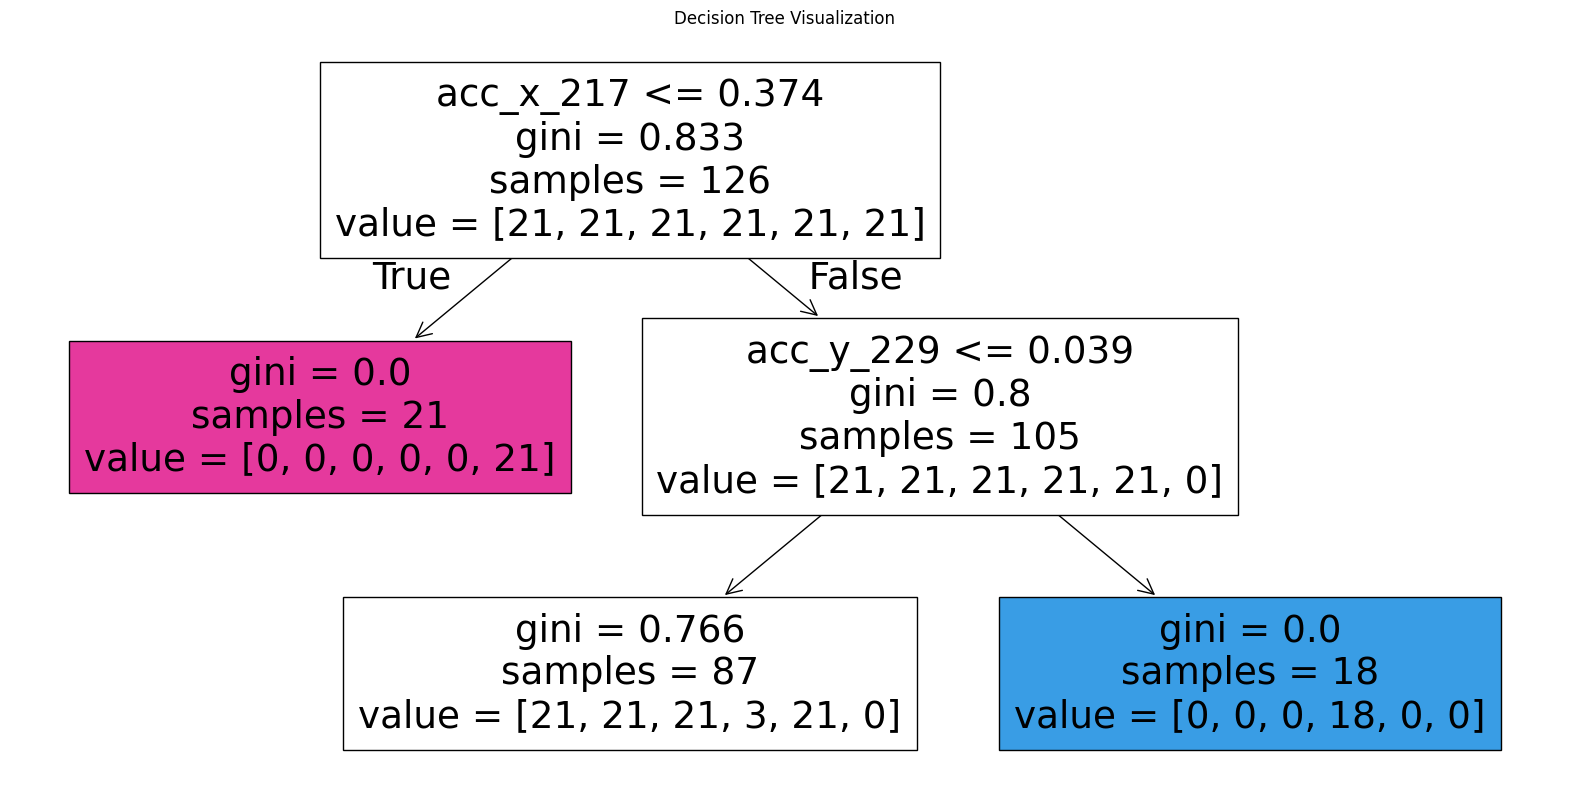

Accuracy: 0.4259
Recall: 0.4259
Precision: 0.8081

Confusion Matrix:

   1  2  3  4  5  6
1  6  0  0  3  0  0
2  9  0  0  0  0  0
3  8  0  0  1  0  0
4  1  0  0  8  0  0
5  9  0  0  0  0  0
6  0  0  0  0  0  9
Tree of Depth : 3


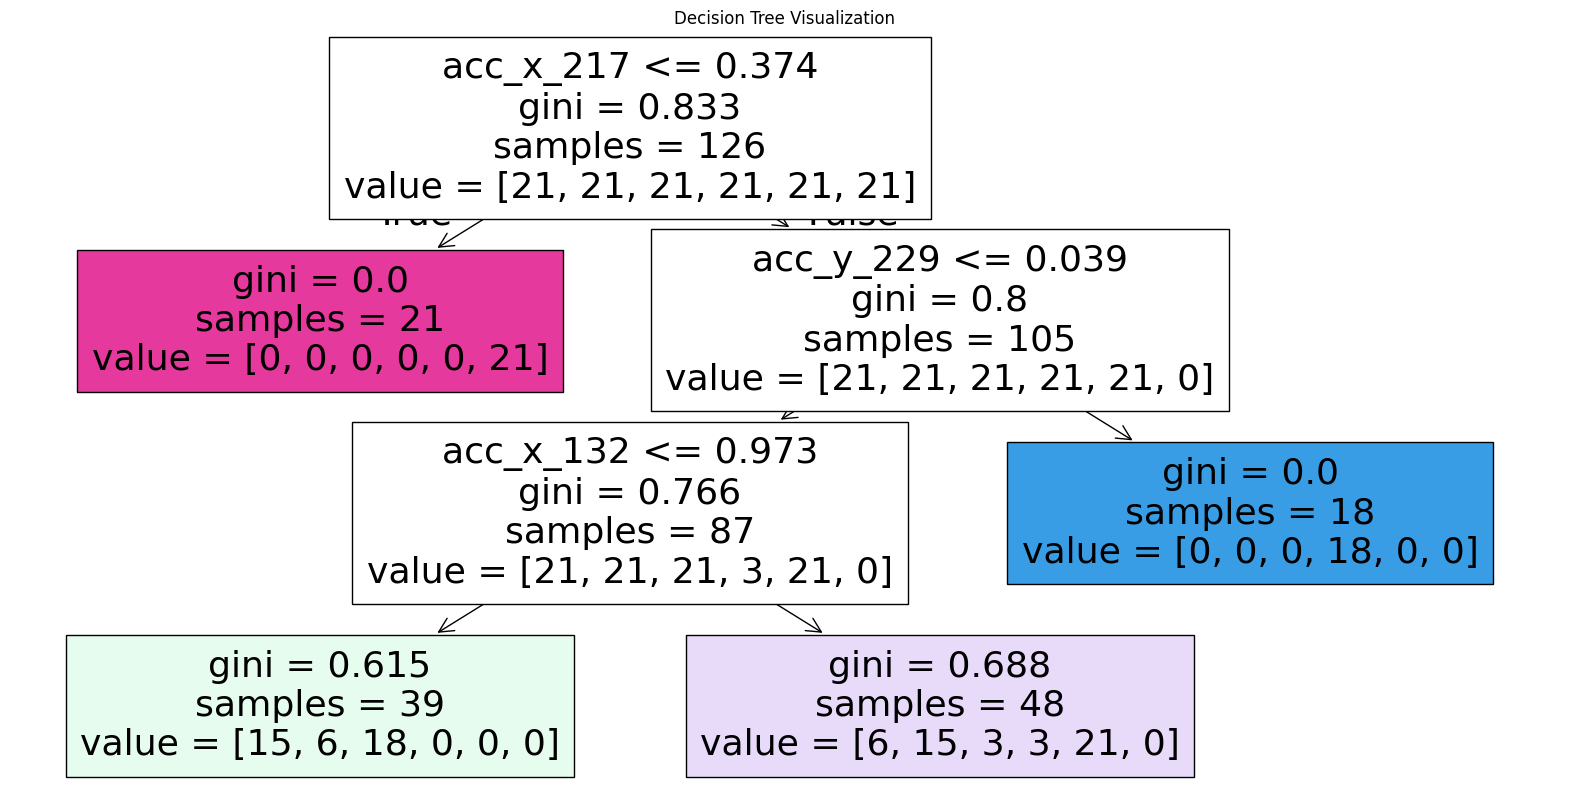

Accuracy: 0.5370
Recall: 0.5370
Precision: 0.7323

Confusion Matrix:

   1  2  3  4  5  6
1  0  0  2  3  4  0
2  0  0  4  0  5  0
3  0  0  4  1  4  0
4  0  0  0  8  1  0
5  0  0  1  0  8  0
6  0  0  0  0  0  9
Tree of Depth : 4


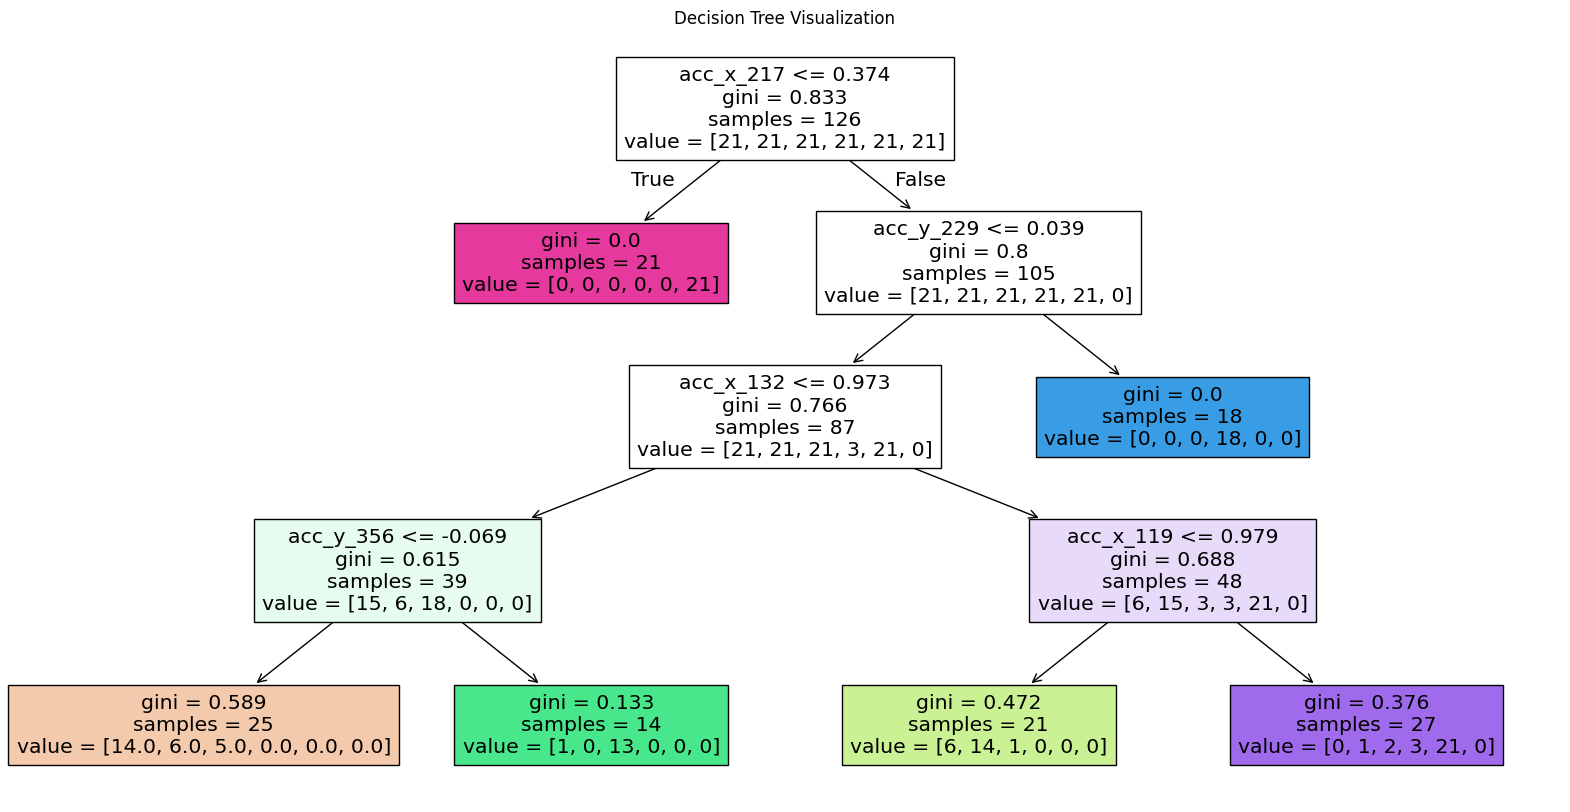

Accuracy: 0.5741
Recall: 0.5741
Precision: 0.6587

Confusion Matrix:

   1  2  3  4  5  6
1  2  4  0  3  0  0
2  4  4  0  0  1  0
3  3  4  1  1  0  0
4  0  0  0  8  1  0
5  1  1  0  0  7  0
6  0  0  0  0  0  9
Tree of Depth : 5


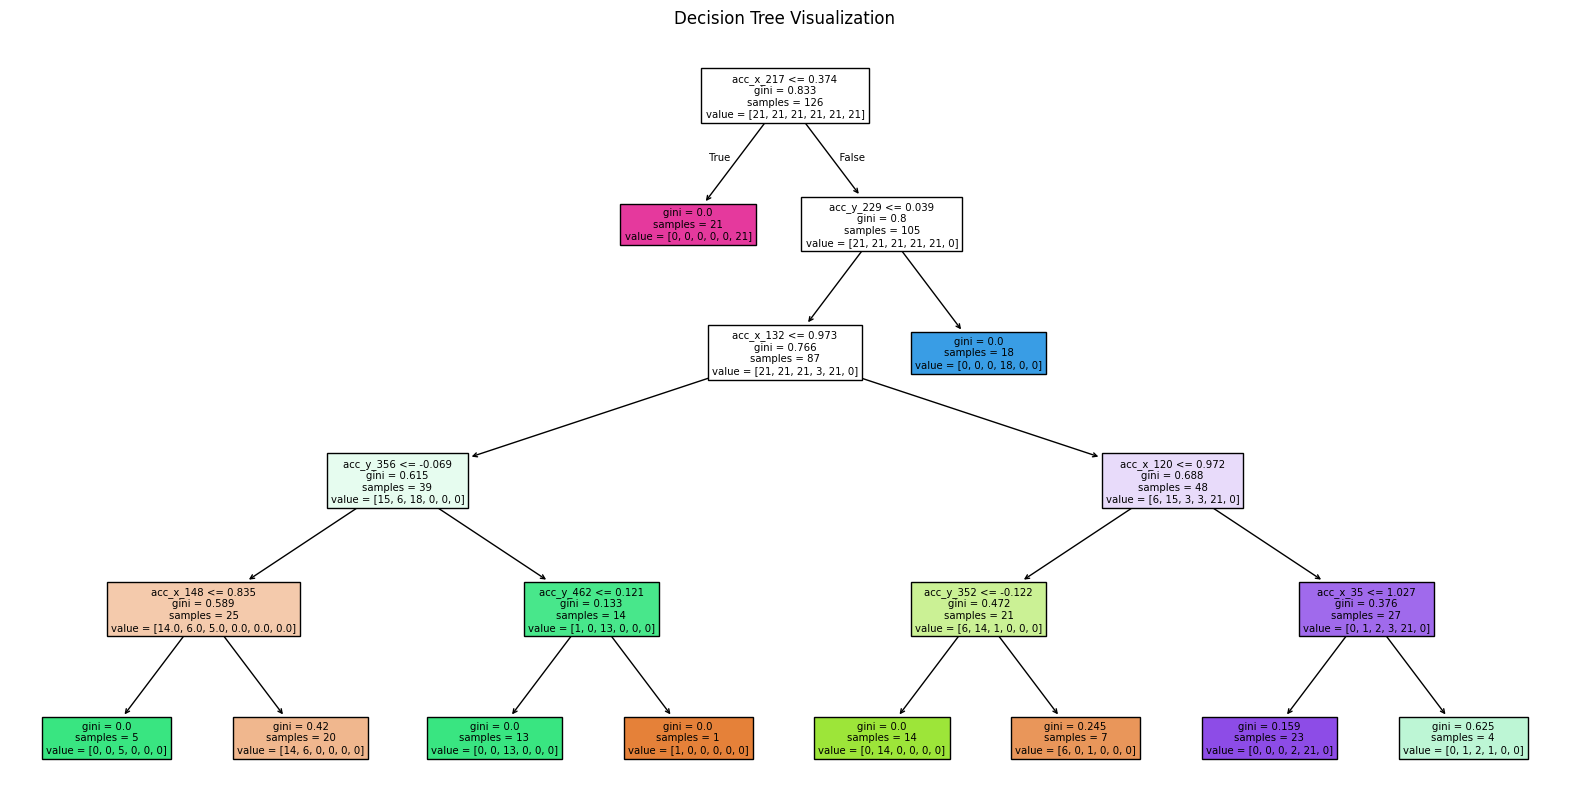

Accuracy: 0.6111
Recall: 0.6111
Precision: 0.5917

Confusion Matrix:

   1  2  3  4  5  6
1  3  2  1  3  0  0
2  3  4  1  0  1  0
3  5  2  1  1  0  0
4  0  0  0  8  1  0
5  1  0  0  0  8  0
6  0  0  0  0  0  9
Tree of Depth : 6


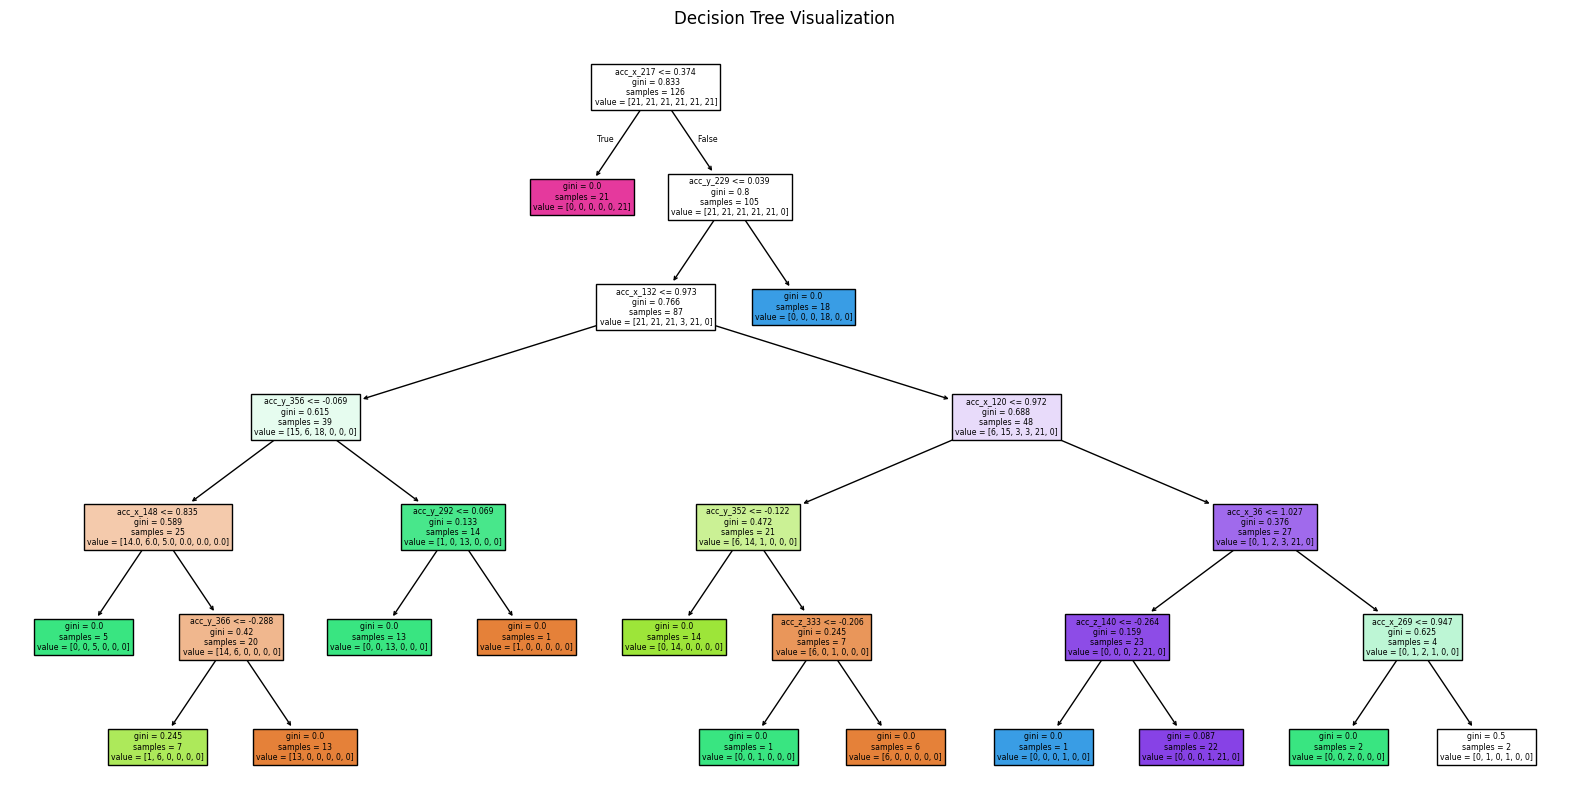

Accuracy: 0.6481
Recall: 0.6481
Precision: 0.6108

Confusion Matrix:

   1  2  3  4  5  6
1  2  3  1  3  0  0
2  1  6  1  0  1  0
3  5  2  1  1  0  0
4  0  0  0  9  0  0
5  0  1  0  0  8  0
6  0  0  0  0  0  9
Tree of Depth : 7


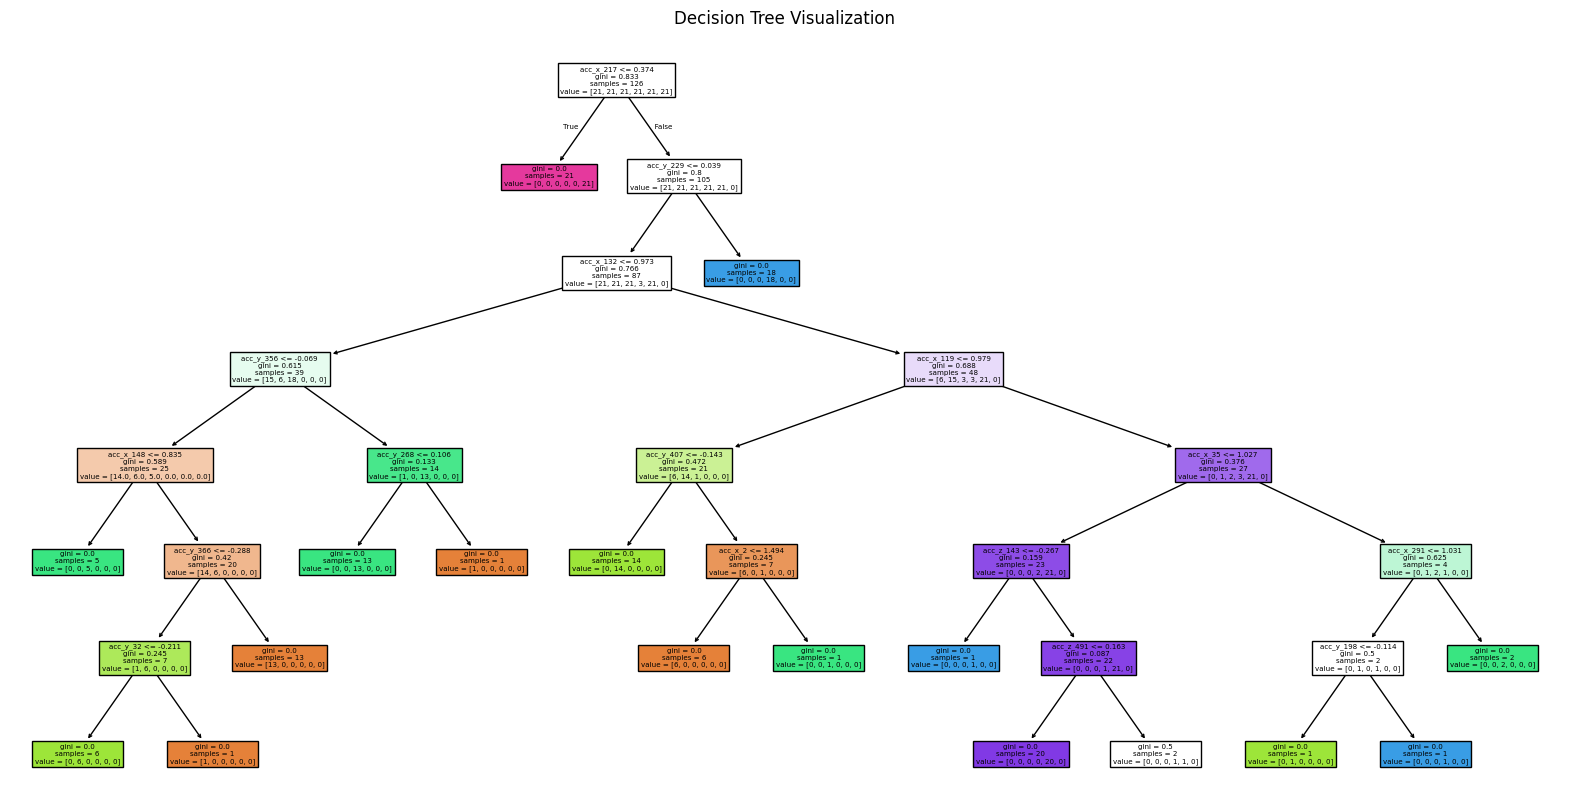

Accuracy: 0.6111
Recall: 0.6111
Precision: 0.6165

Confusion Matrix:

   1  2  3  4  5  6
1  4  2  0  3  0  0
2  2  5  1  0  1  0
3  5  2  1  1  0  0
4  0  0  0  8  1  0
5  1  1  0  1  6  0
6  0  0  0  0  0  9
Tree of Depth : 8


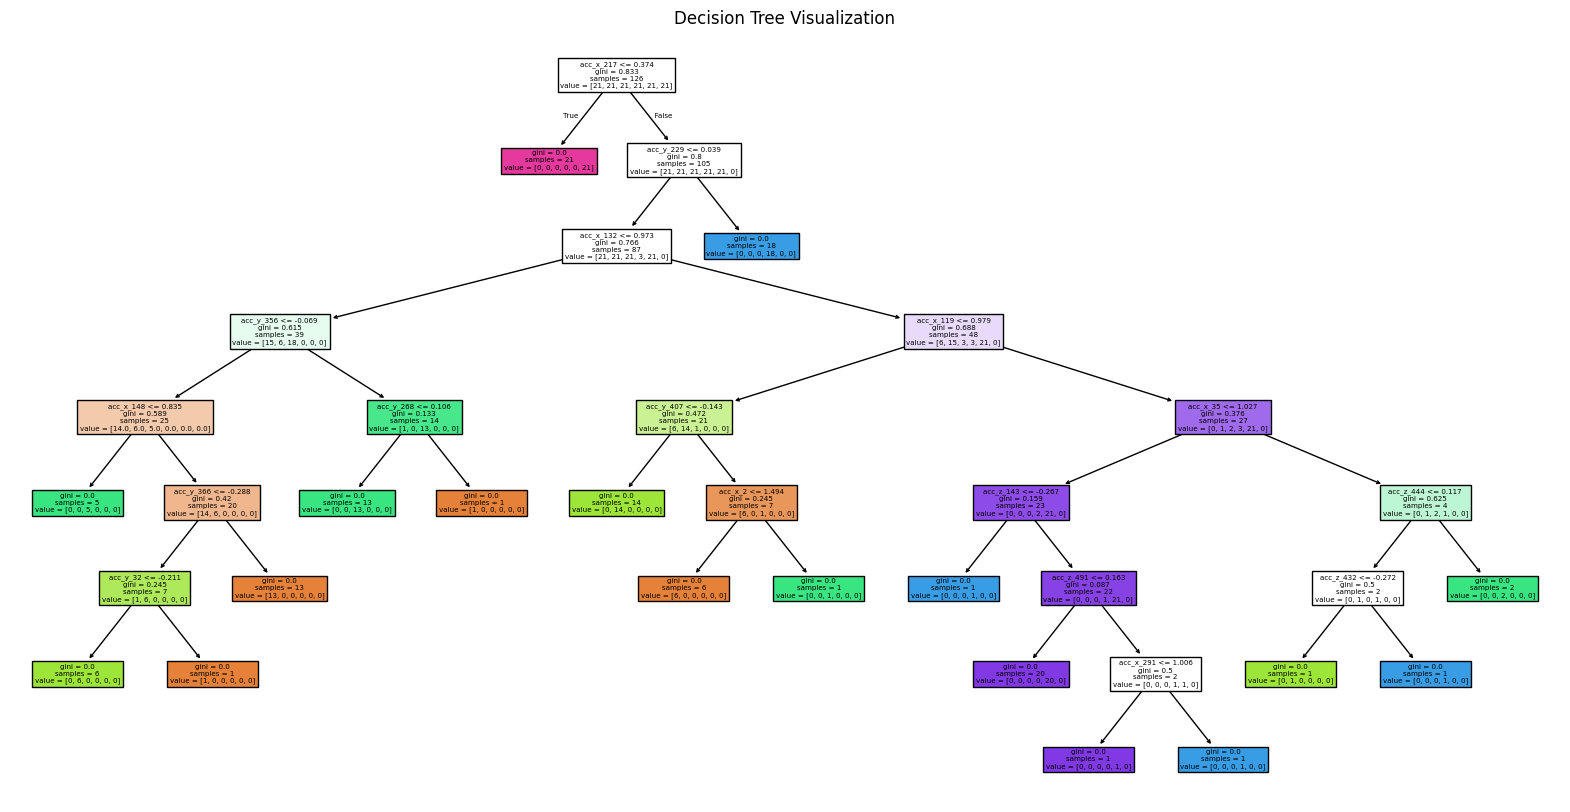

Accuracy: 0.6296
Recall: 0.6296
Precision: 0.6296

Confusion Matrix:

   1  2  3  4  5  6
1  4  2  0  3  0  0
2  2  5  1  0  1  0
3  5  2  1  1  0  0
4  0  0  0  8  1  0
5  1  1  0  0  7  0
6  0  0  0  0  0  9


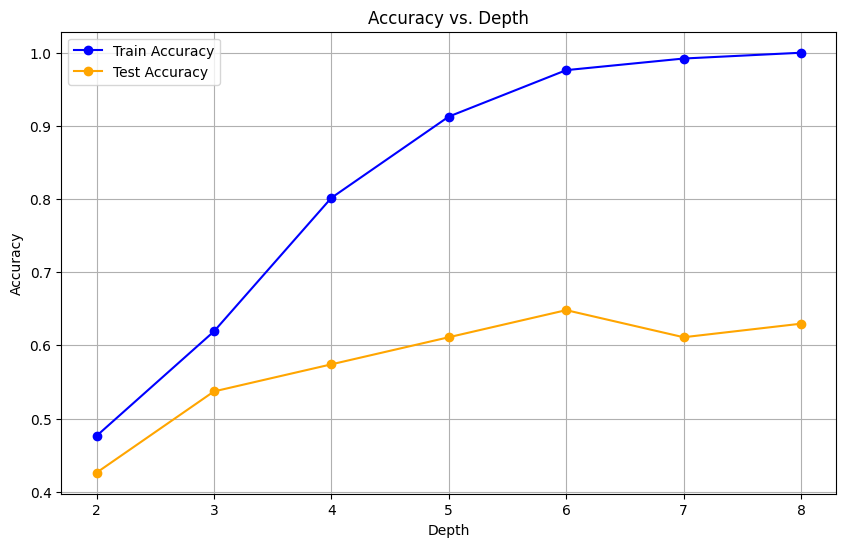

In [8]:
acc_test1 =[]
acc_train1 = []
depth = []
maxaccraw1 = -1
maxacc = 0
for i in range(2,9):
    print("Tree of Depth :",i)
    acc_test_point,acc_train_point,cm = decision_tree_raw(X_test,X_train,Y_test,Y_train,depth = i)
    if acc_test_point >maxacc:
        maxacc = acc_test_point
        maxaccraw1 = cm
    acc_test1.append(acc_test_point)
    depth.append(i)
    acc_train1.append(acc_train_point)

accuracy_dataframe = pd.DataFrame({"Depth":depth,"Train Accuracy":acc_train1,"Test Accuracy":acc_test1})

bias_variance_plotter(accuracy_dataframe)


Tree of Depth : 2


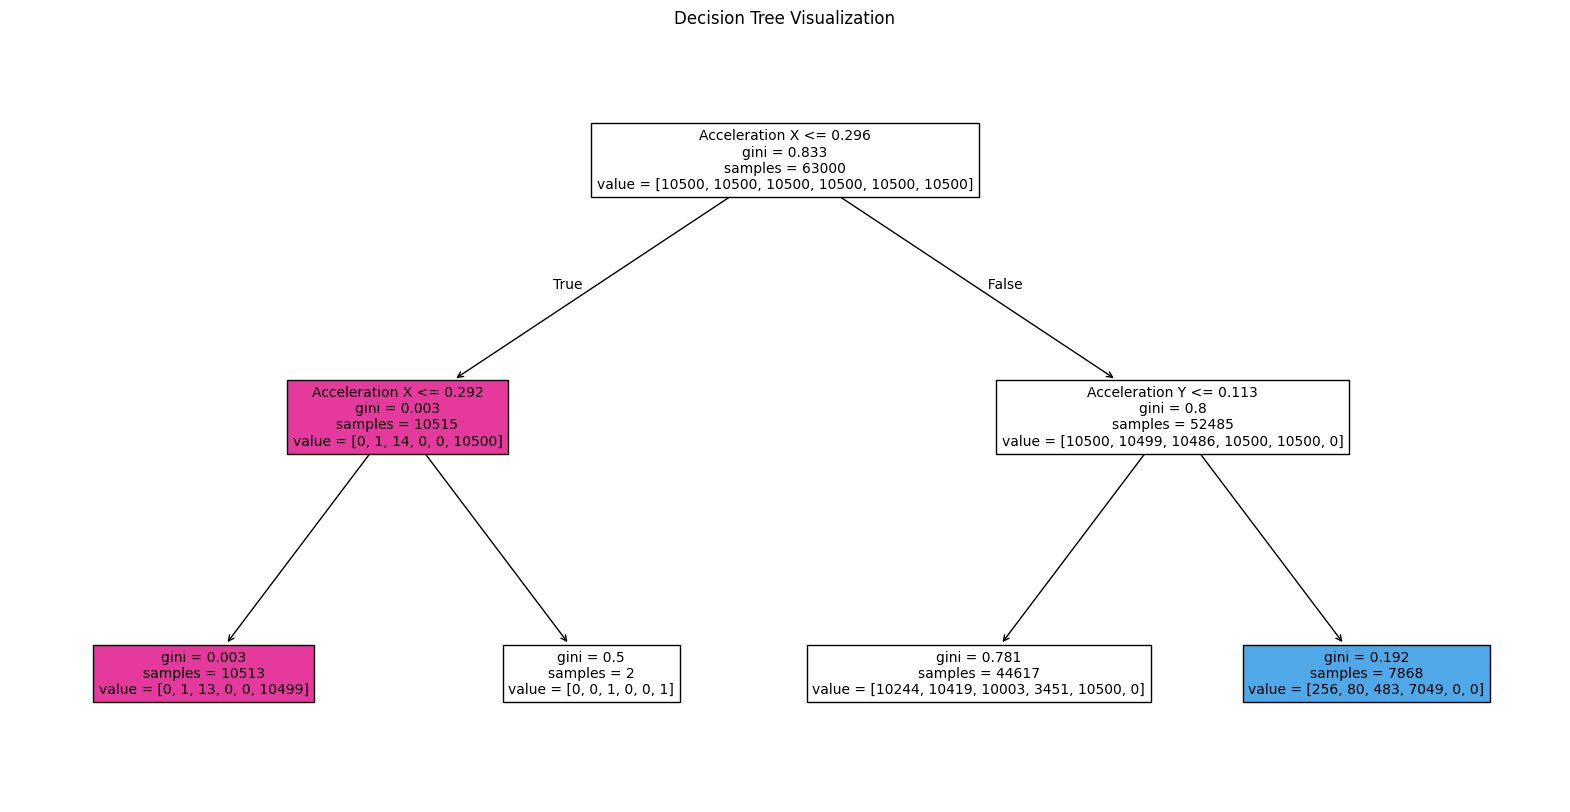

Accuracy: 0.4815
Recall: 0.4815
Precision: 0.8739

Confusion Matrix:

   1  2  3  4  5  6
1  0  0  0  0  9  0
2  0  0  0  0  9  0
3  0  0  0  0  9  0
4  0  0  0  8  1  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 3


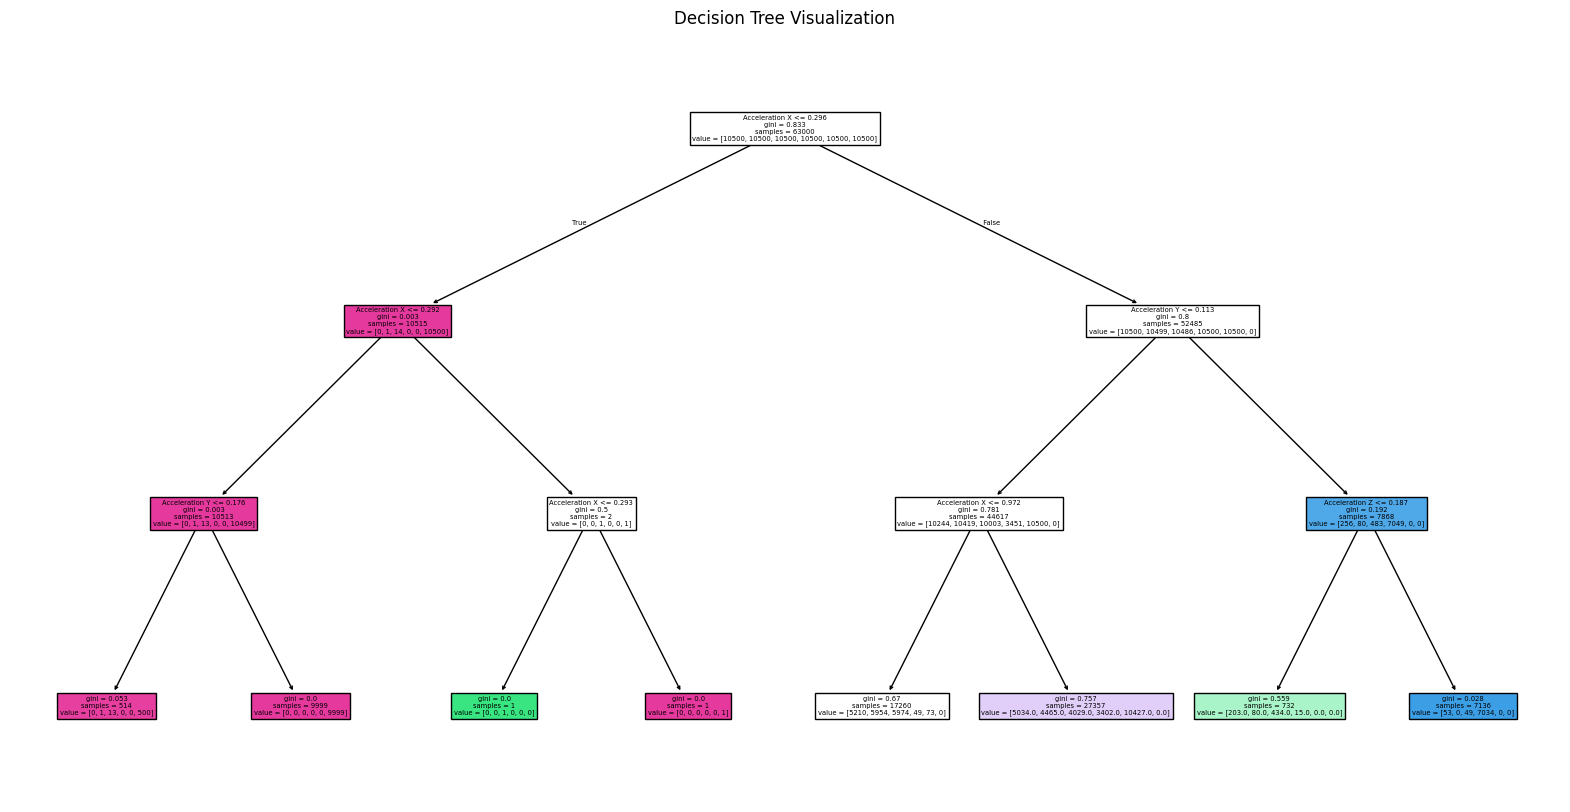

Accuracy: 0.6296
Recall: 0.6296
Precision: 0.8263

Confusion Matrix:

   1  2  3  4  5  6
1  0  0  4  0  5  0
2  0  0  7  0  2  0
3  0  0  9  0  0  0
4  0  0  1  7  1  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 4


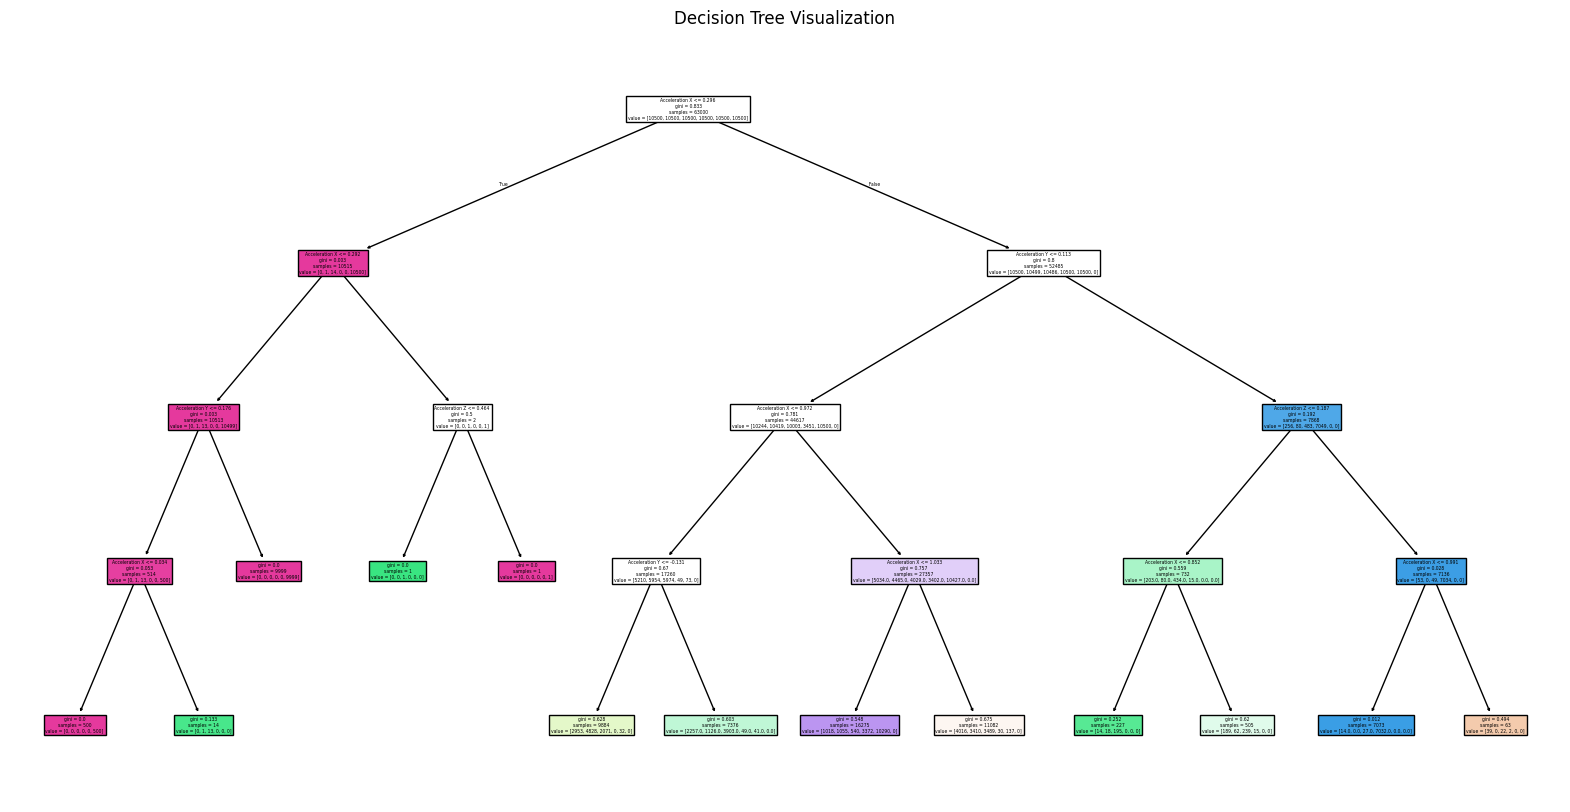

Accuracy: 0.8148
Recall: 0.8148
Precision: 0.8306

Confusion Matrix:

   1  2  3  4  5  6
1  7  1  1  0  0  0
2  3  6  0  0  0  0
3  2  1  6  0  0  0
4  0  0  1  7  1  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 5


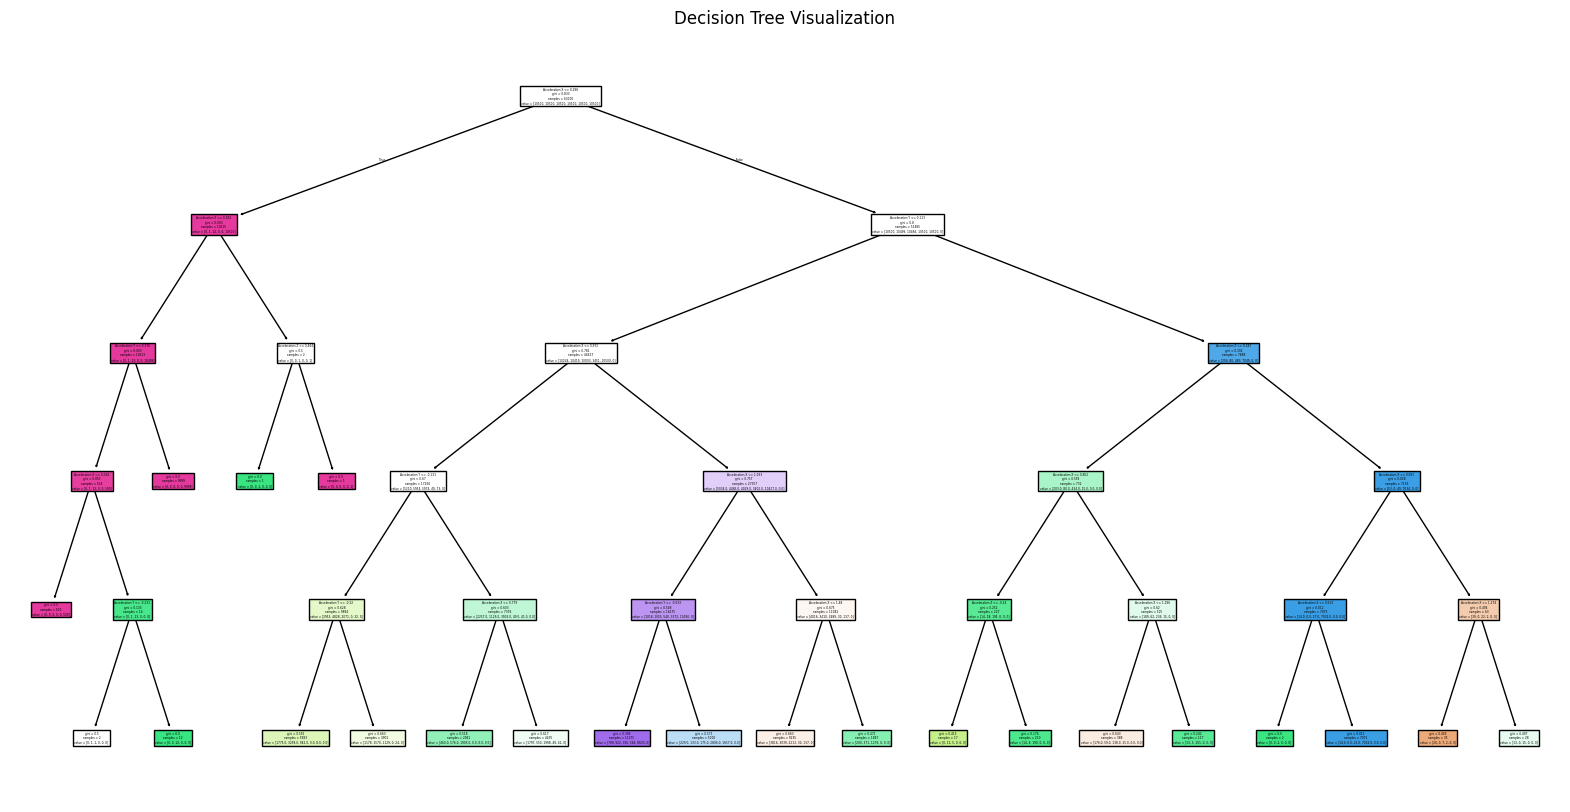

Accuracy: 0.9074
Recall: 0.9074
Precision: 0.9175

Confusion Matrix:

   1  2  3  4  5  6
1  8  1  0  0  0  0
2  2  7  0  0  0  0
3  0  1  8  0  0  0
4  1  0  0  8  0  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 6


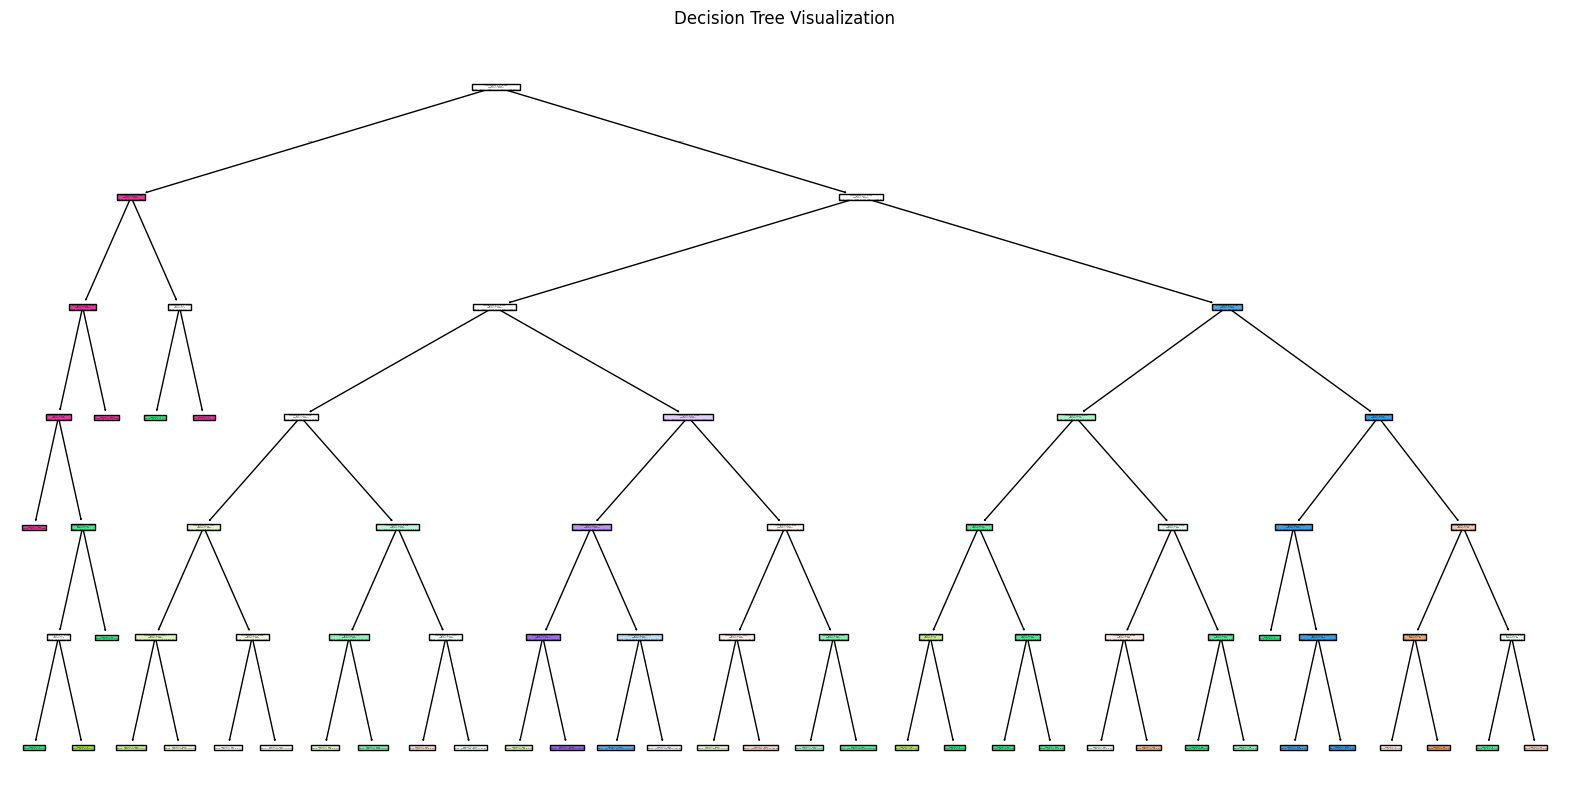

Accuracy: 0.7963
Recall: 0.7963
Precision: 0.8373

Confusion Matrix:

   1  2  3  4  5  6
1  2  6  1  0  0  0
2  0  9  0  0  0  0
3  0  3  6  0  0  0
4  1  0  0  8  0  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 7


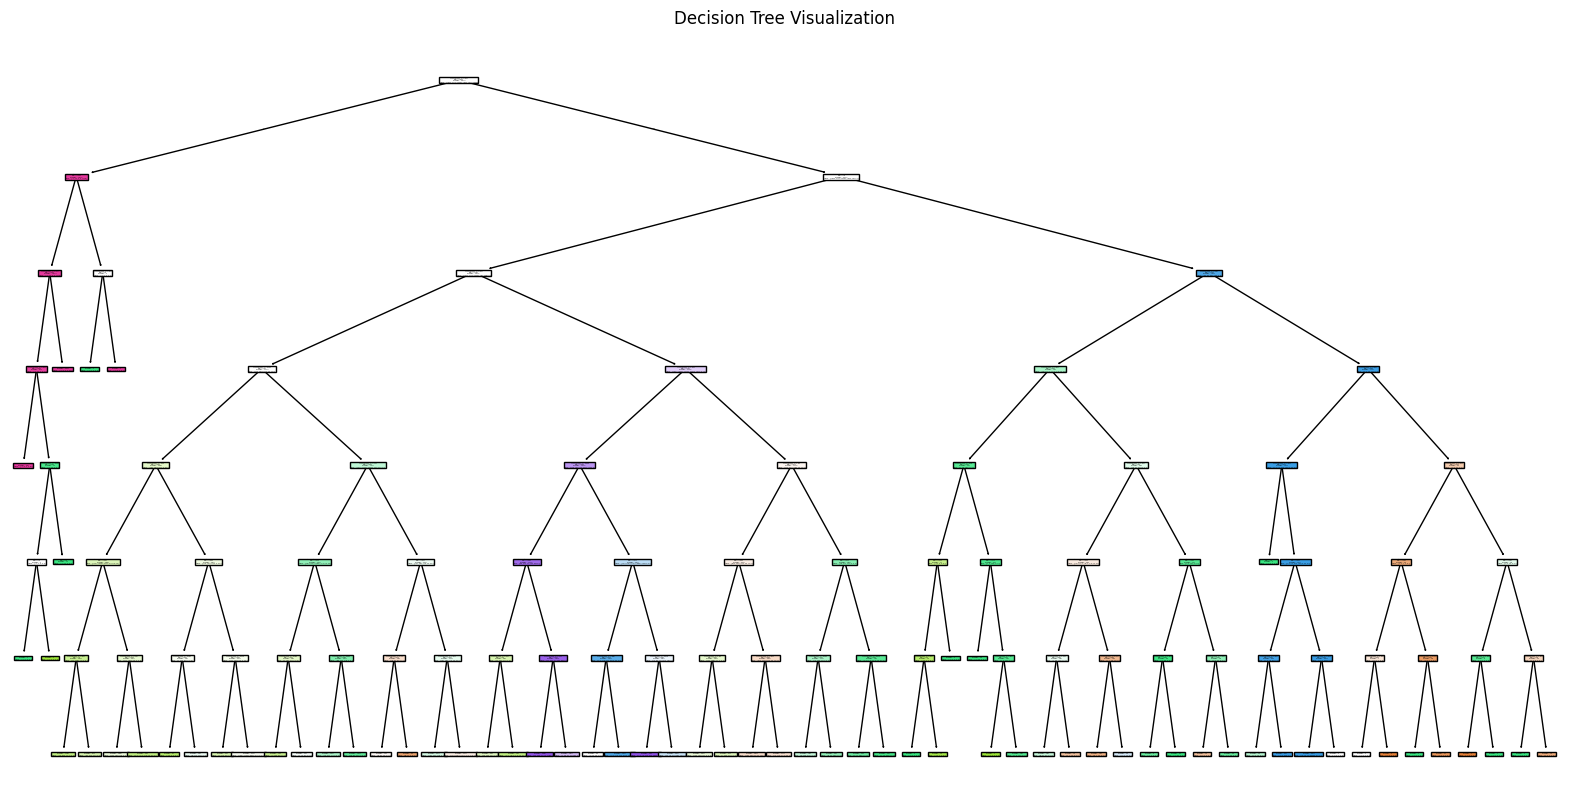

Accuracy: 0.7778
Recall: 0.7778
Precision: 0.8407

Confusion Matrix:

   1  2  3  4  5  6
1  3  6  0  0  0  0
2  1  8  0  0  0  0
3  0  4  5  0  0  0
4  1  0  0  8  0  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 8


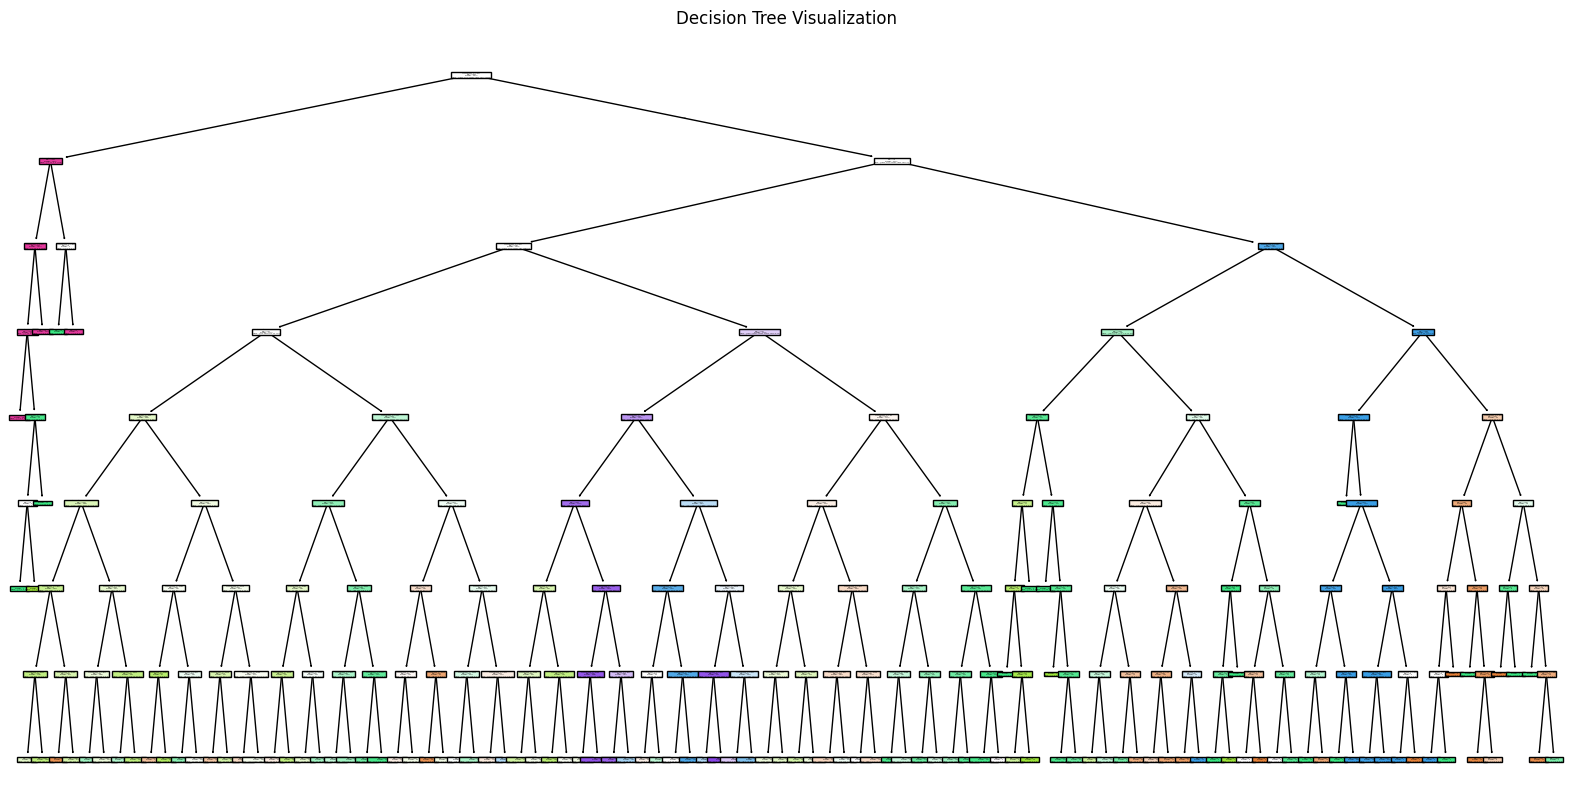

Accuracy: 0.7593
Recall: 0.7593
Precision: 0.8074

Confusion Matrix:

   1  2  3  4  5  6
1  2  6  1  0  0  0
2  1  8  0  0  0  0
3  0  4  5  0  0  0
4  0  0  0  8  1  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9


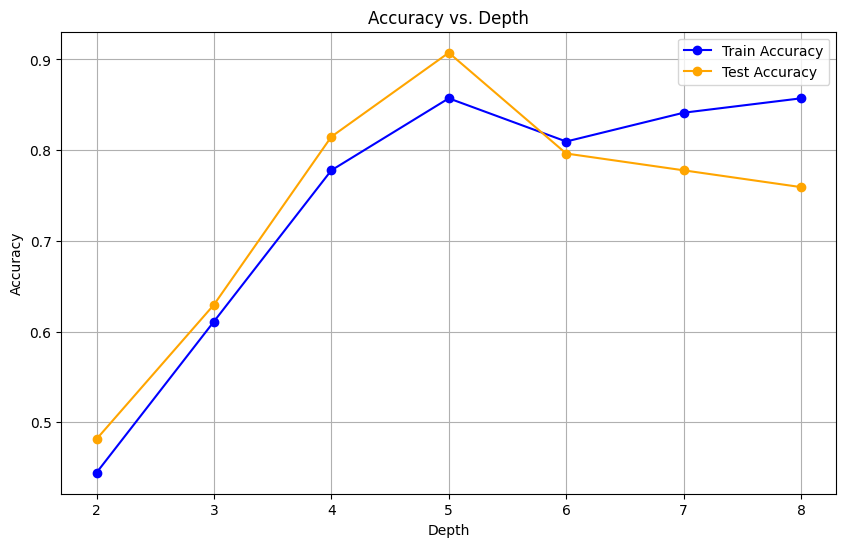

In [9]:
acc_test =[]
acc_train = []
depth = []
maxaccraw = -1
maxacc = 0
for i in range(2,9):
    print("Tree of Depth :",i)
    acc_test_point,acc_train_point,cm = decision_tree_raw2(X_test,X_train,Y_test,Y_train,depth = i)
    if acc_test_point >maxacc:
        maxacc = acc_test_point
        maxaccraw = cm
    acc_test.append(acc_test_point)
    depth.append(i)
    acc_train.append(acc_train_point)

accuracy_dataframe = pd.DataFrame({"Depth":depth,"Train Accuracy":acc_train,"Test Accuracy":acc_test})

bias_variance_plotter(accuracy_dataframe)


$\bold{Part 2}$

Below, there are decision tress of varying depth (from 2 to 8) trained from TSFEL featurized data. The testing and training accuracy across different models, along wiht the metrics for each model depth is plotted

In [10]:
cfg = tsfel.get_features_by_domain()
feature_df = tsfel.time_series_features_extractor(cfg, X_train, verbose = 0, fs = 50)
feature_df_test = tsfel.time_series_features_extractor(cfg, X_test, verbose = 0, fs = 50)


Tree of Depth : 2


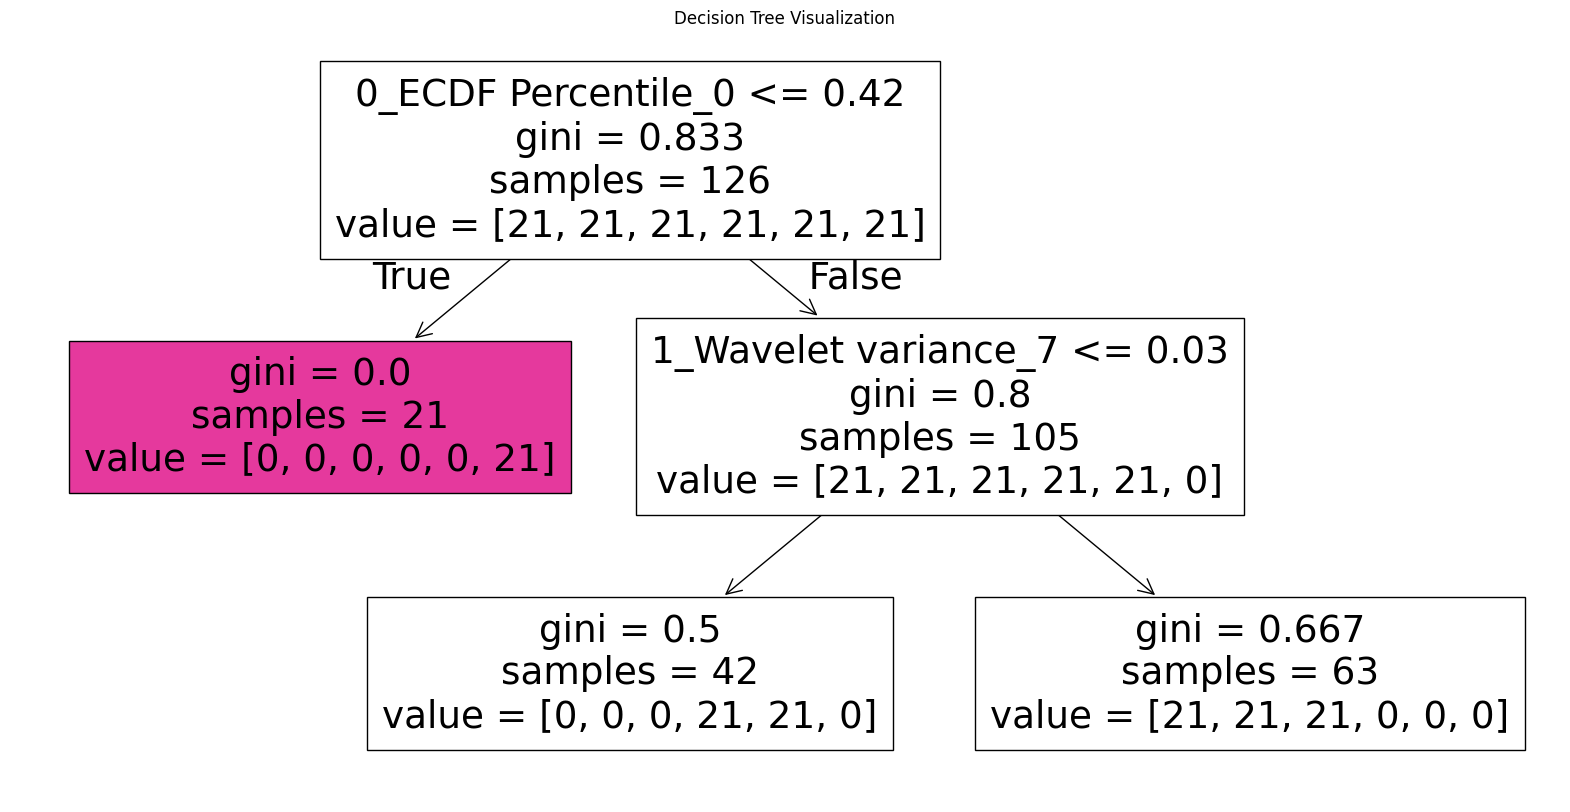

Accuracy: 0.5000
Recall: 0.5000
Precision: 0.8056

Confusion Matrix:

   1  2  3  4  5  6
1  9  0  0  0  0  0
2  9  0  0  0  0  0
3  9  0  0  0  0  0
4  0  0  0  9  0  0
5  0  0  0  9  0  0
6  0  0  0  0  0  9
Tree of Depth : 3


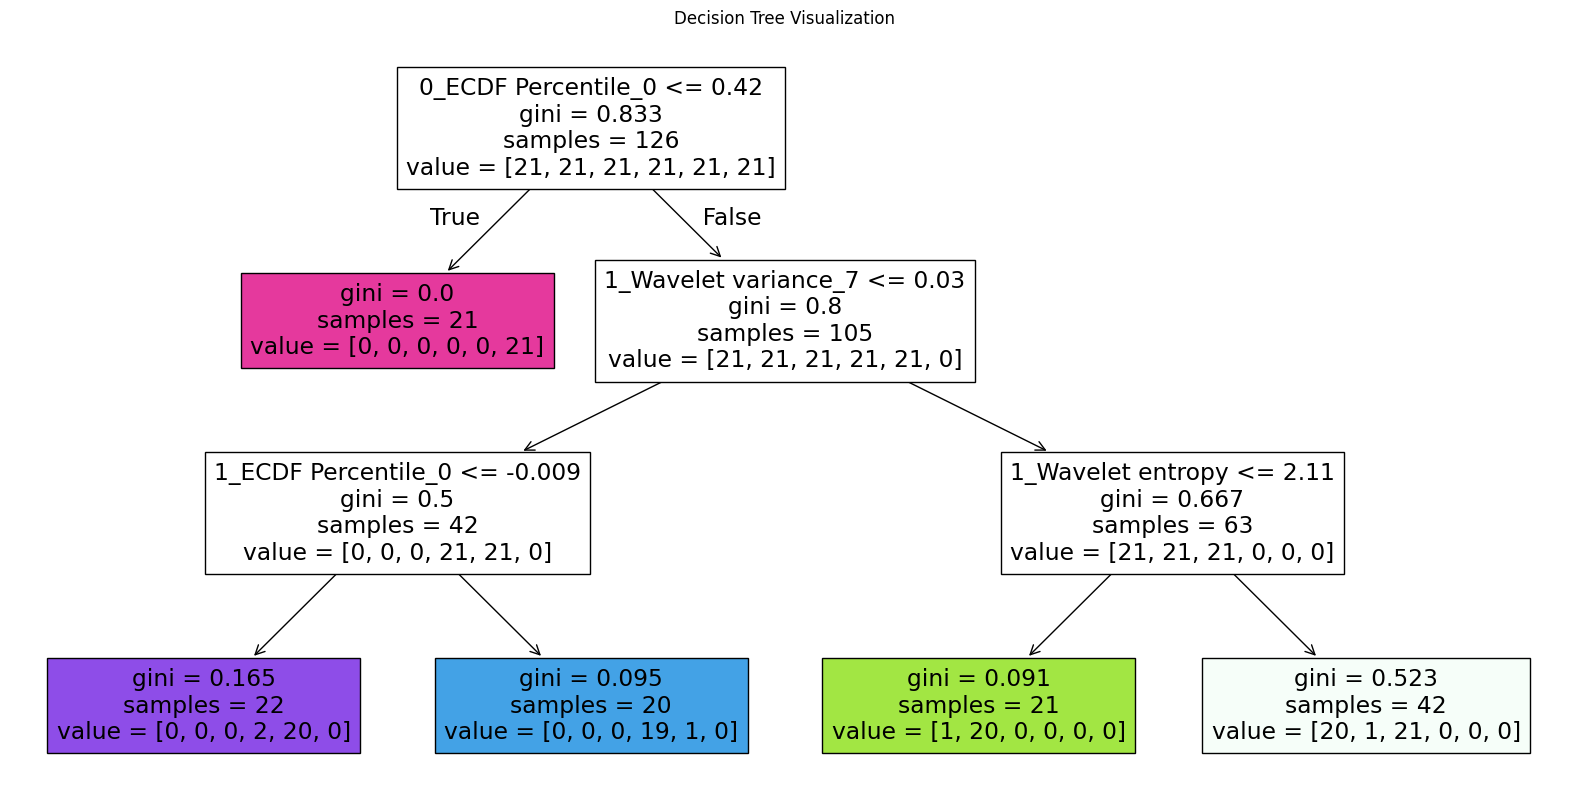

Accuracy: 0.7778
Recall: 0.7778
Precision: 0.8487

Confusion Matrix:

   1  2  3  4  5  6
1  0  2  7  0  0  0
2  0  9  0  0  0  0
3  0  2  7  0  0  0
4  0  0  0  8  1  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 4


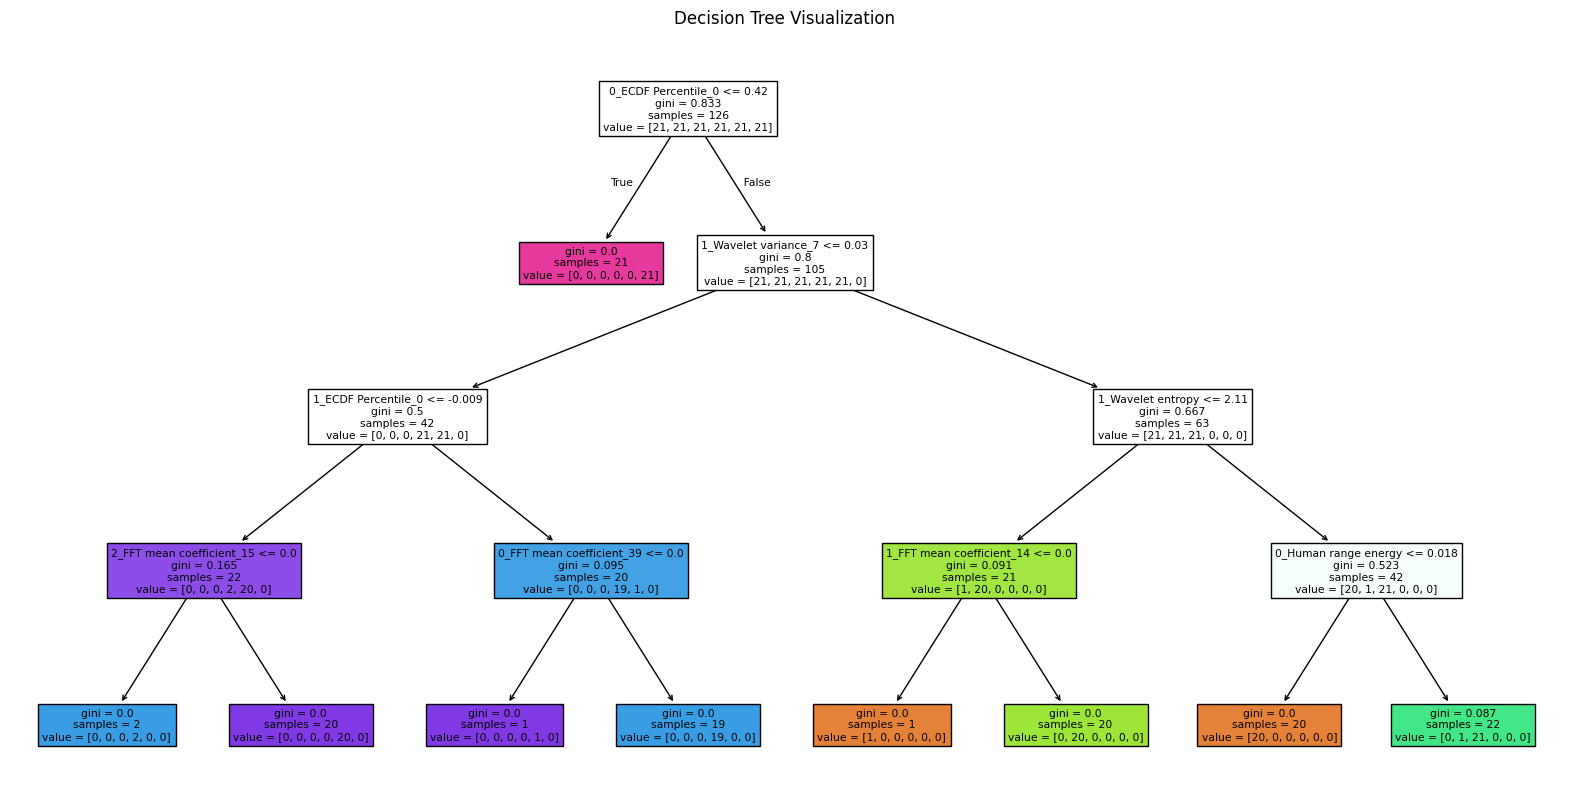

Accuracy: 0.8704
Recall: 0.8704
Precision: 0.8826

Confusion Matrix:

   1  2  3  4  5  6
1  7  1  1  0  0  0
2  1  8  0  0  0  0
3  0  2  7  0  0  0
4  0  0  0  7  2  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 5


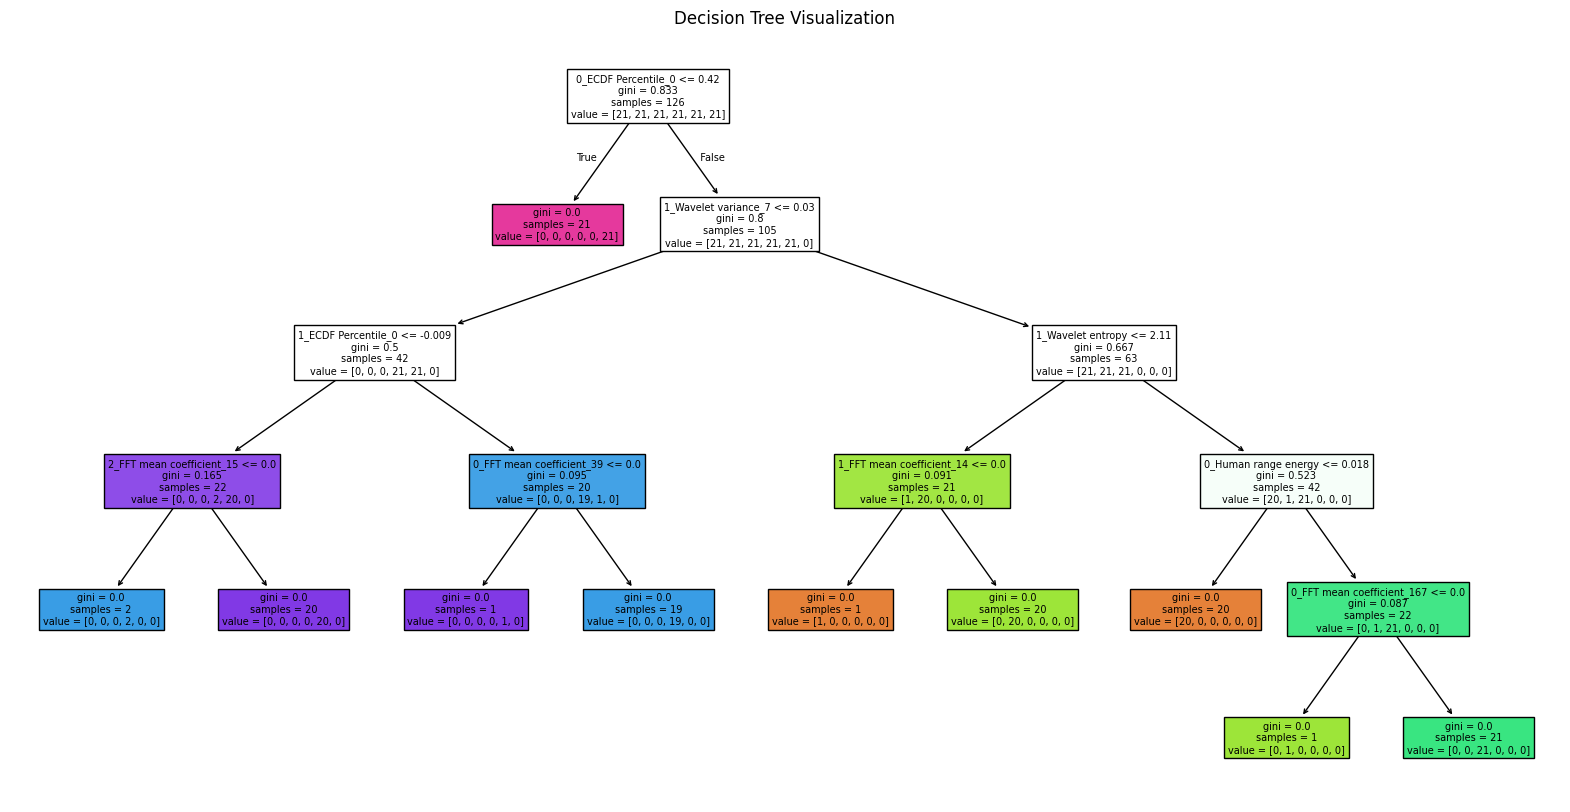

Accuracy: 0.8148
Recall: 0.8148
Precision: 0.8441

Confusion Matrix:

   1  2  3  4  5  6
1  7  1  1  0  0  0
2  1  8  0  0  0  0
3  0  5  4  0  0  0
4  0  0  0  7  2  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 6


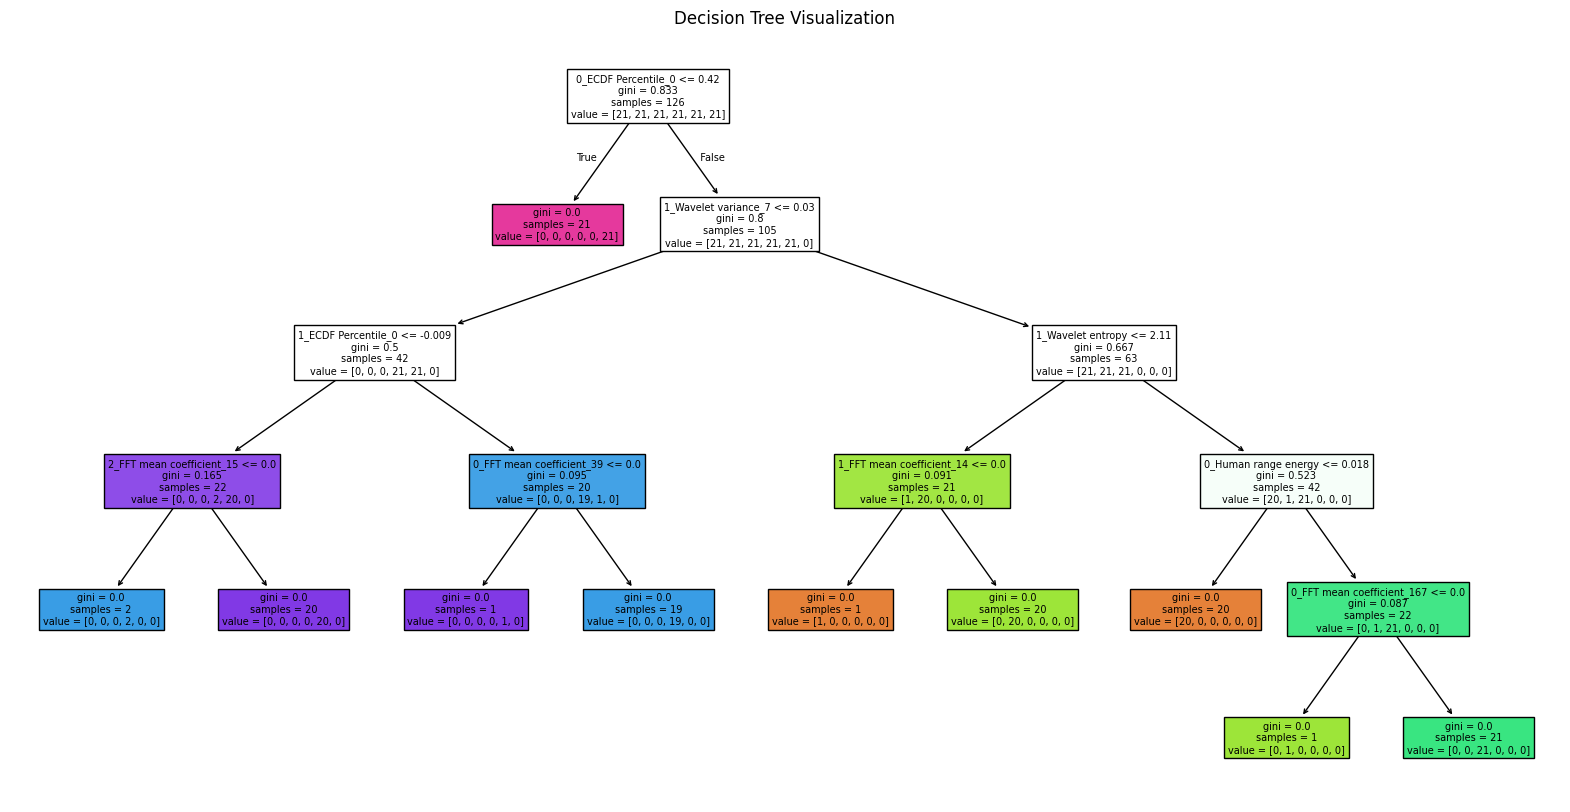

Accuracy: 0.8148
Recall: 0.8148
Precision: 0.8441

Confusion Matrix:

   1  2  3  4  5  6
1  7  1  1  0  0  0
2  1  8  0  0  0  0
3  0  5  4  0  0  0
4  0  0  0  7  2  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 7


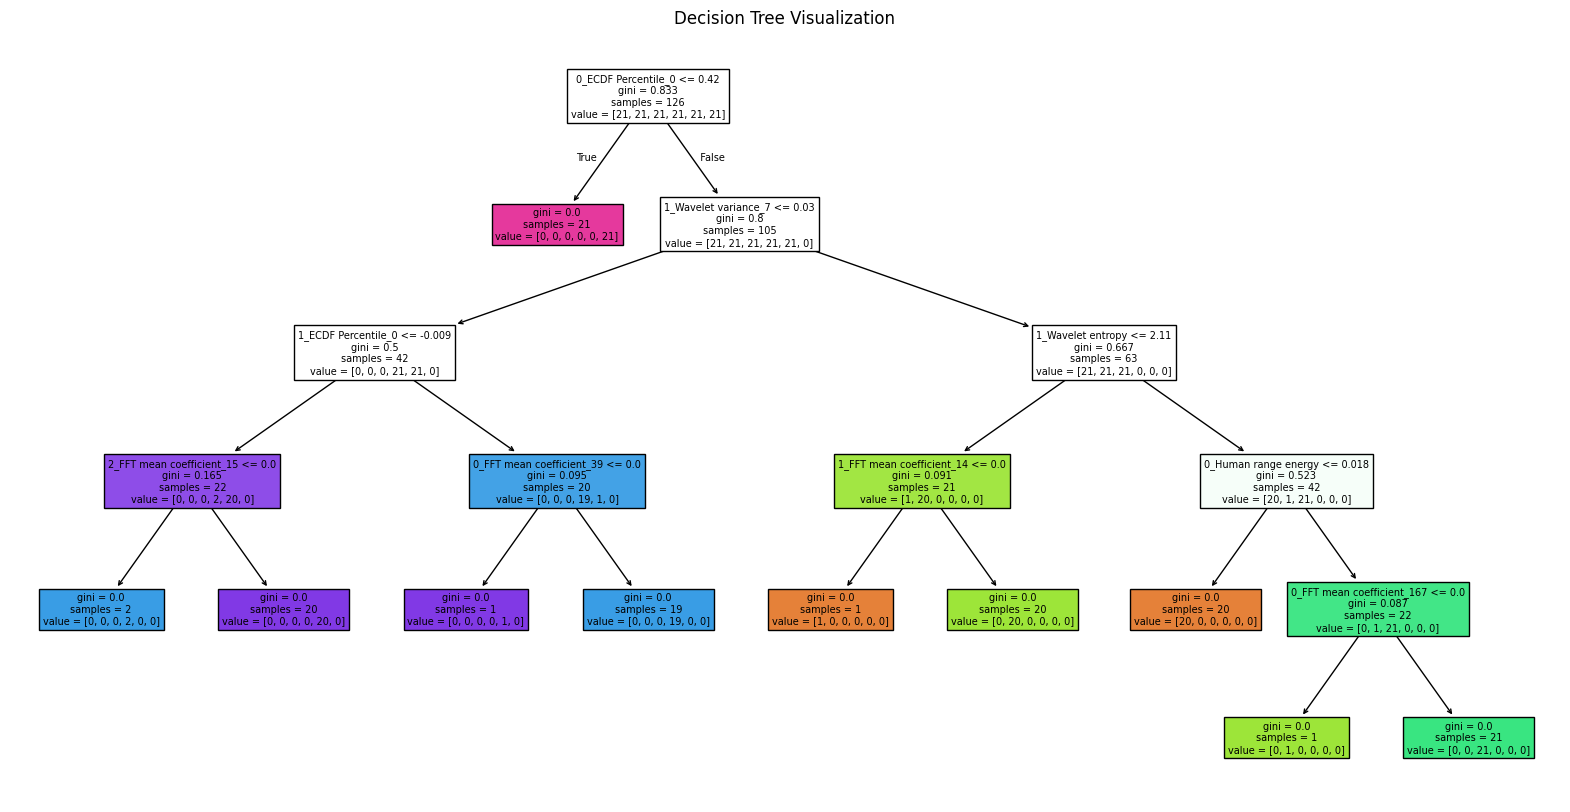

Accuracy: 0.8148
Recall: 0.8148
Precision: 0.8441

Confusion Matrix:

   1  2  3  4  5  6
1  7  1  1  0  0  0
2  1  8  0  0  0  0
3  0  5  4  0  0  0
4  0  0  0  7  2  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9
Tree of Depth : 8


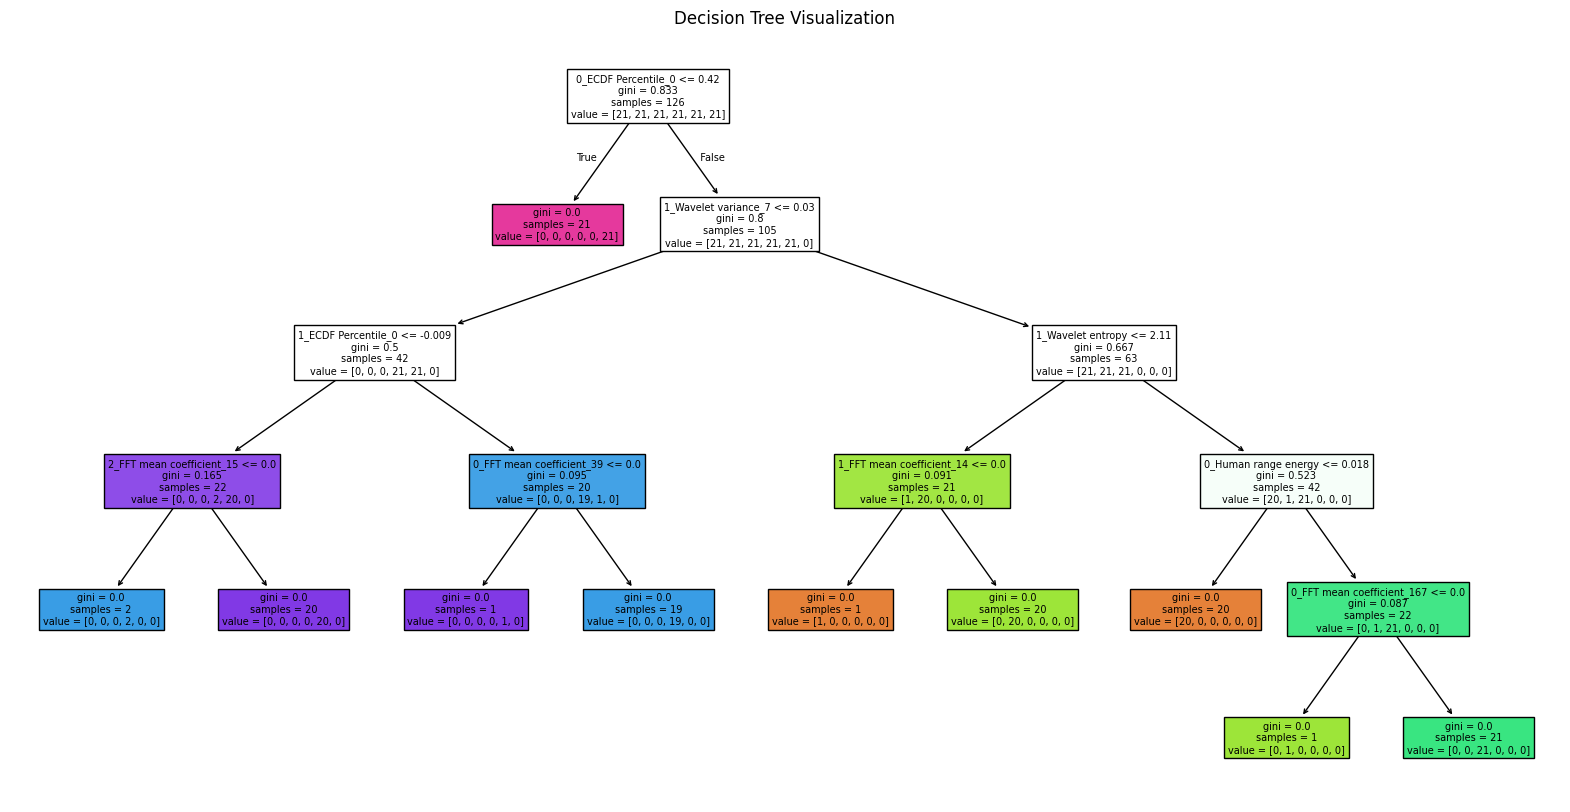

Accuracy: 0.8148
Recall: 0.8148
Precision: 0.8441

Confusion Matrix:

   1  2  3  4  5  6
1  7  1  1  0  0  0
2  1  8  0  0  0  0
3  0  5  4  0  0  0
4  0  0  0  7  2  0
5  0  0  0  0  9  0
6  0  0  0  0  0  9


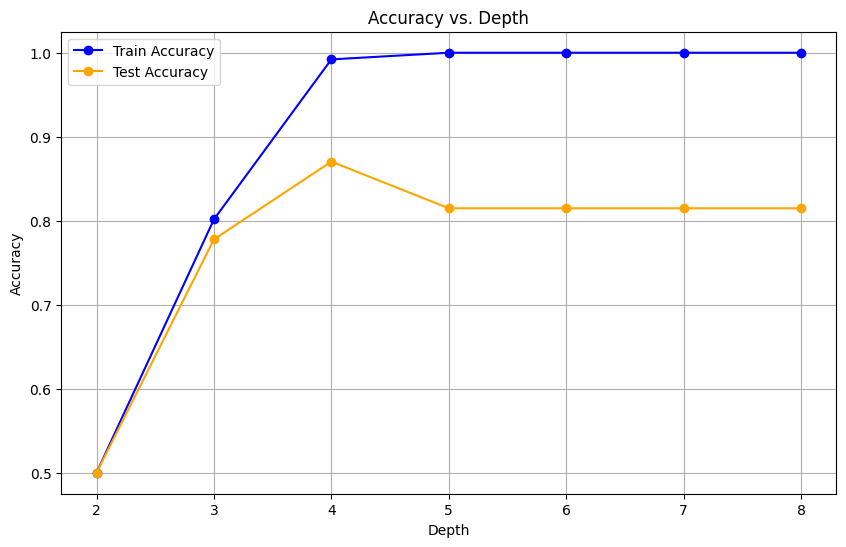

In [11]:
acc_test2 =[]
acc_train2 = []
depth = []
maxacc = -1
maxacctsfel = 0
for i in range(2,9):
    print("Tree of Depth :",i)
    acc_test_point,acc_train_point,cm = decision_tree_TSFEL(feature_df,feature_df_test,depth = i)
    if acc_test_point >maxacc:
        maxacc = acc_test_point
        maxacctsfel = cm
    acc_test2.append(acc_test_point)
    depth.append(i)
    acc_train2.append(acc_train_point)

accuracy_dataframe = pd.DataFrame({"Depth":depth,"Train Accuracy":acc_train2,"Test Accuracy":acc_test2})

bias_variance_plotter(accuracy_dataframe)

$\bold{Part\ 3}$

Below, there are decision tress of varying depth (from 2 to 8) trained from given featurised data. The testing and training accuracy across different models, along wiht the metrics for each model depth is plotted

Tree of Depth : 2


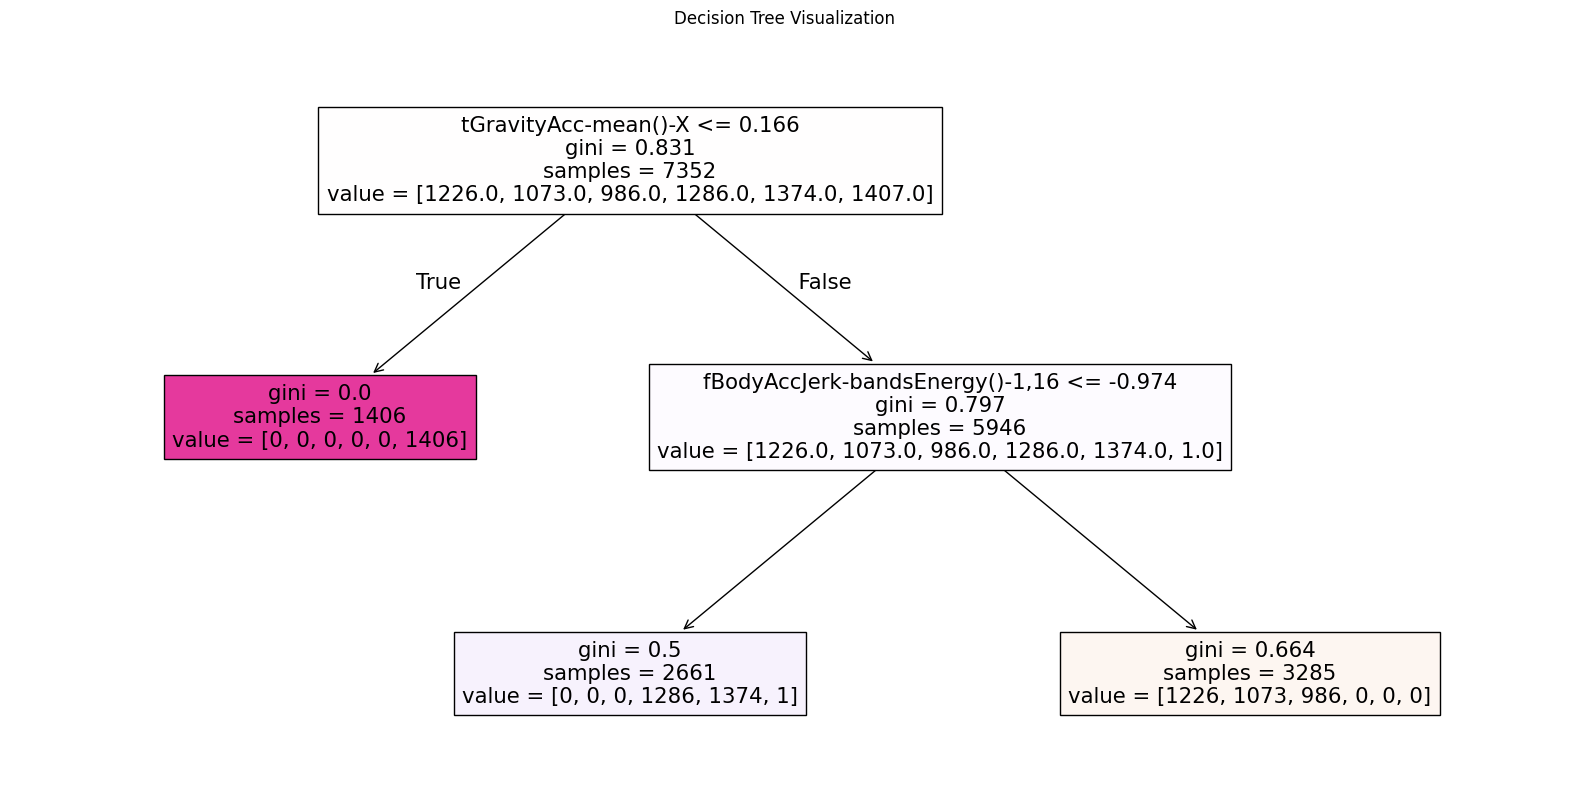

Accuracy: 0.5310
Recall: 0.5310
Precision: 0.8052

Confusion Matrix:

     1  2  3  4    5    6
1  496  0  0  0    0    0
2  471  0  0  0    0    0
3  420  0  0  0    0    0
4    0  0  0  0  491    0
5    0  0  0  0  532    0
6    0  0  0  0    0  537


Tree of Depth : 3


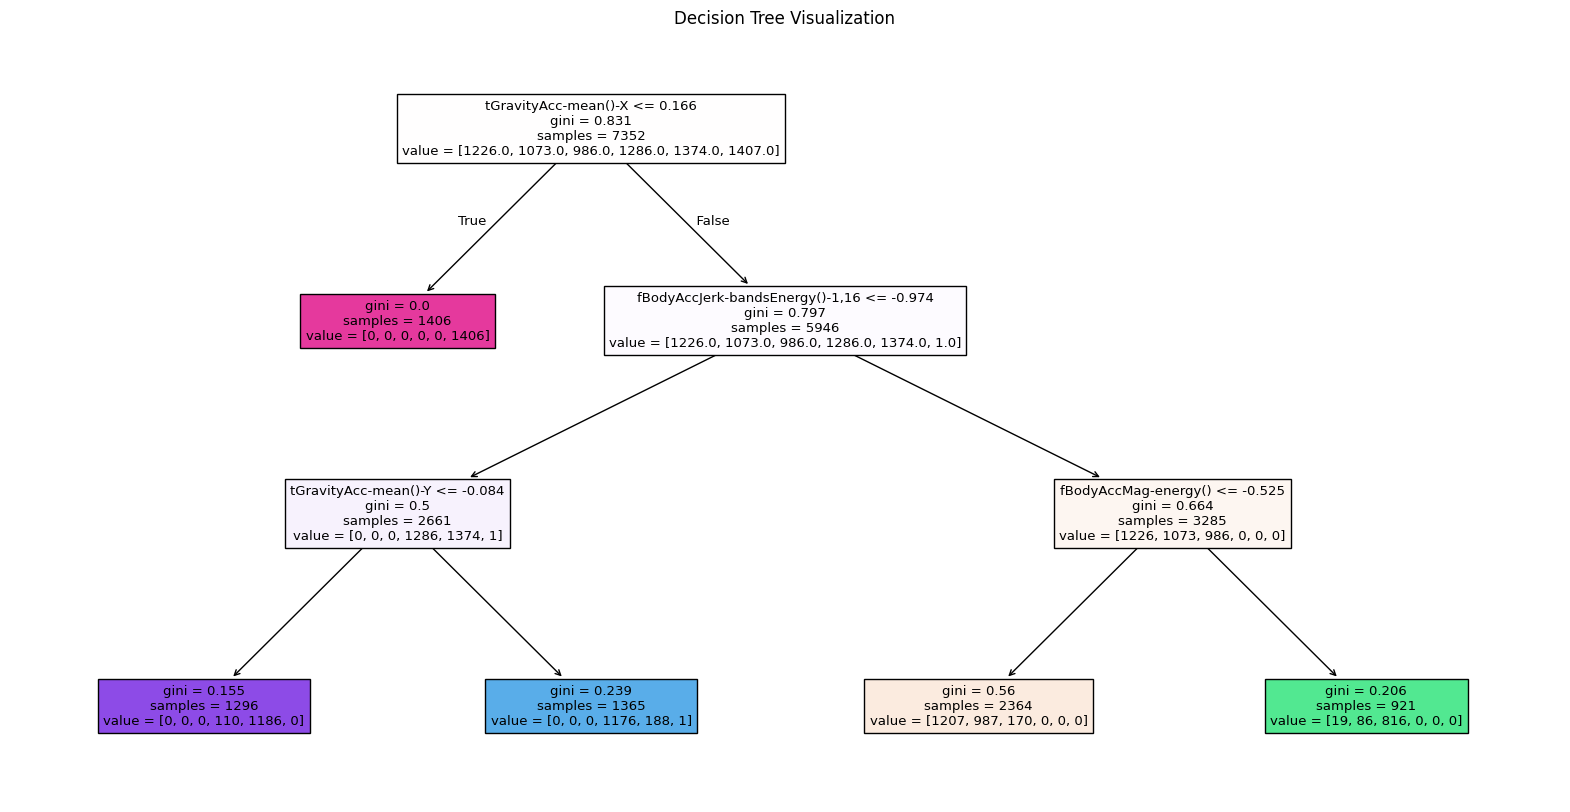

Accuracy: 0.7218
Recall: 0.7218
Precision: 0.8302

Confusion Matrix:

     1  2    3    4    5    6
1  485  0   11    0    0    0
2  463  0    8    0    0    0
3  138  0  282    0    0    0
4    0  0    0  400   91    0
5    0  0    0  109  423    0
6    0  0    0    0    0  537


Tree of Depth : 4


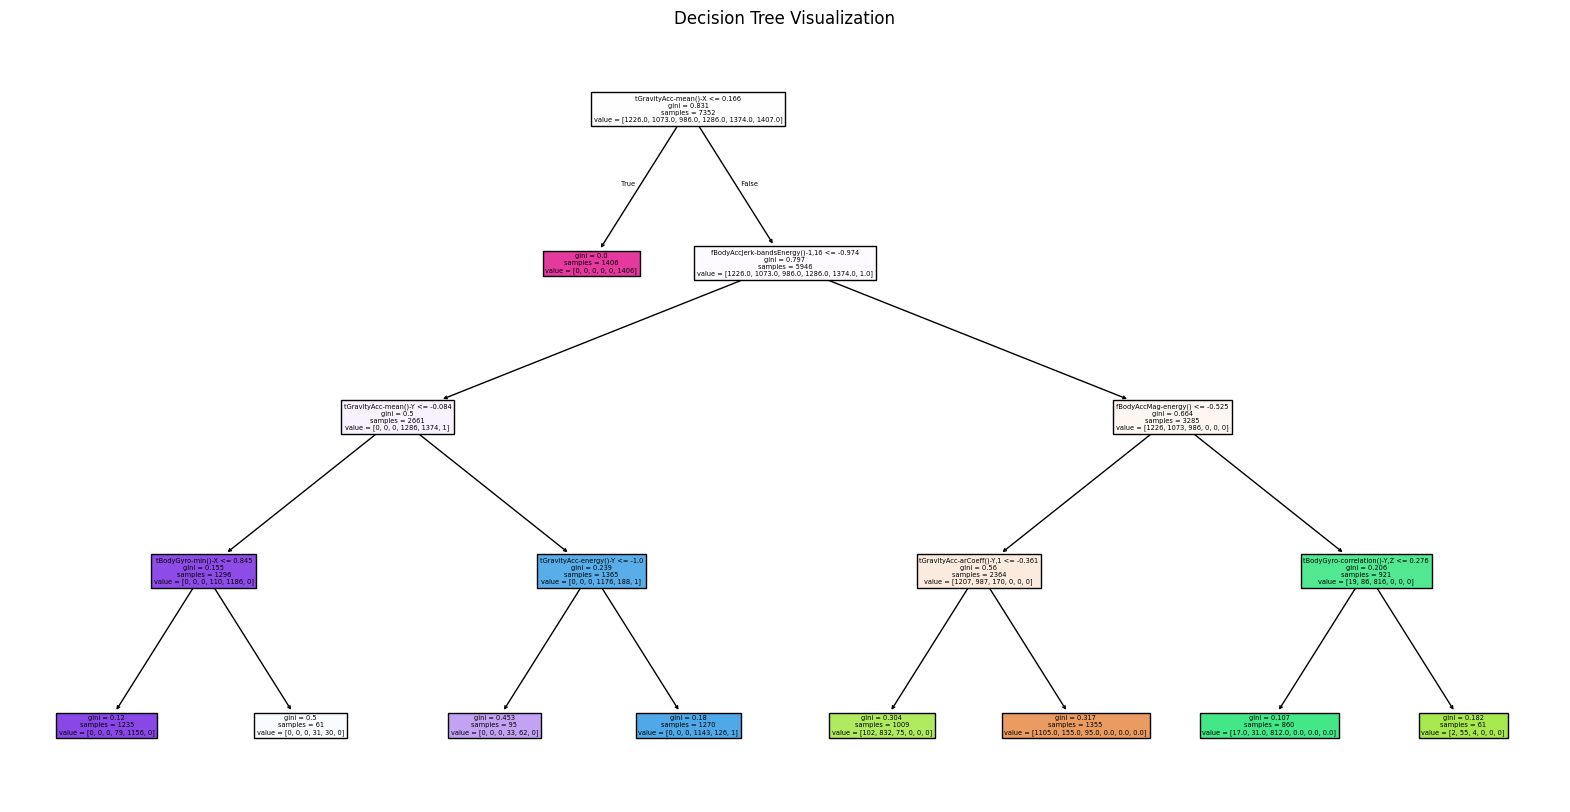

Accuracy: 0.8283
Recall: 0.8283
Precision: 0.8386

Confusion Matrix:

     1    2    3    4    5    6
1  453   32   11    0    0    0
2   88  377    6    0    0    0
3   82   77  261    0    0    0
4    0    0    0  397   94    0
5    0    0    0  116  416    0
6    0    0    0    0    0  537


Tree of Depth : 5


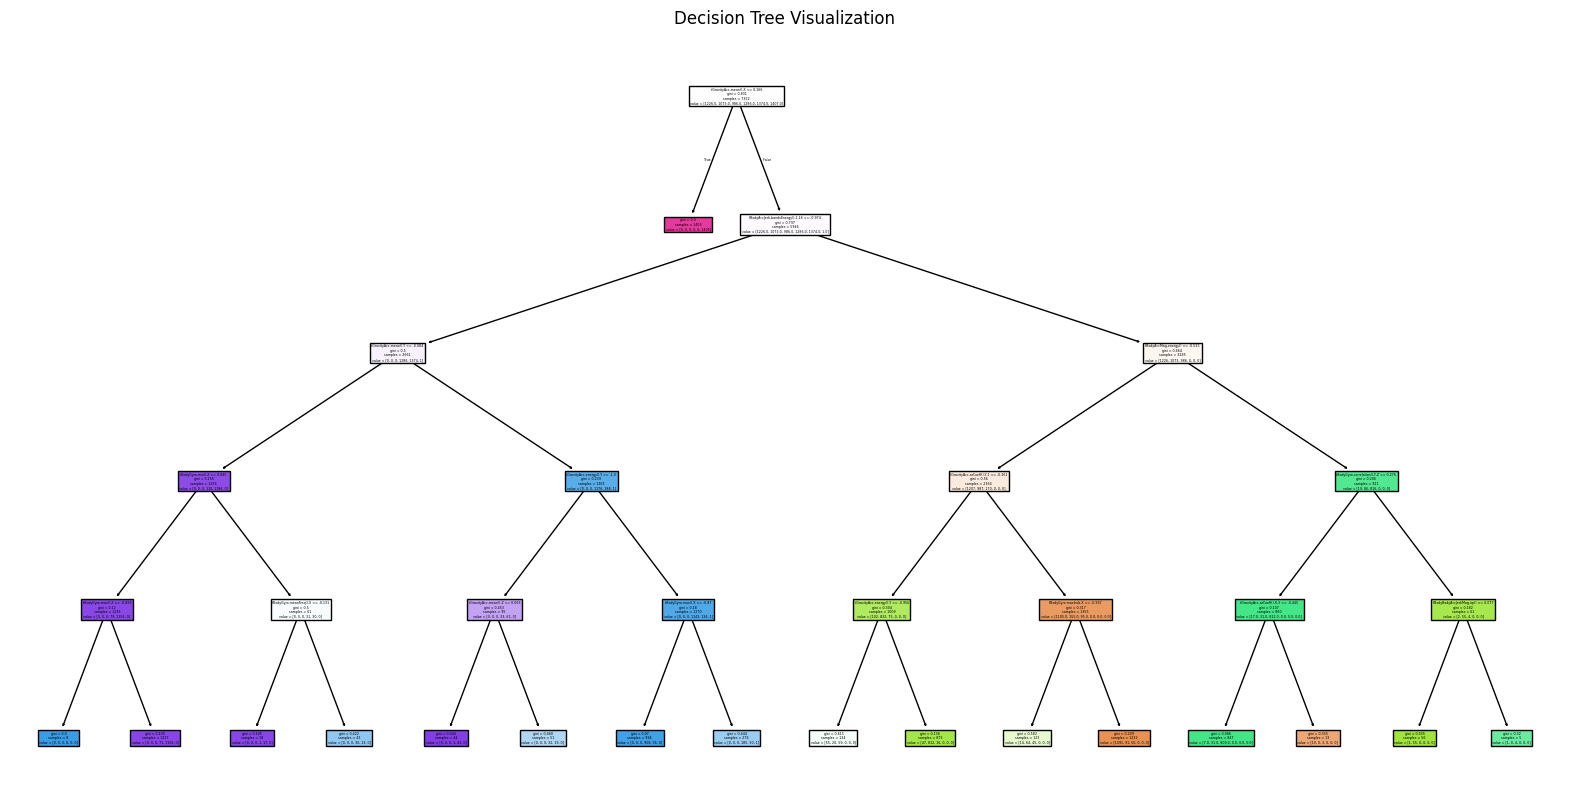

Accuracy: 0.8293
Recall: 0.8293
Precision: 0.8291

Confusion Matrix:

     1    2    3    4    5    6
1  447   17   32    0    0    0
2   44  369   58    0    0    0
3   38  119  263    0    0    0
4    0    0    0  412   79    0
5    0    0    0  116  416    0
6    0    0    0    0    0  537


Tree of Depth : 6


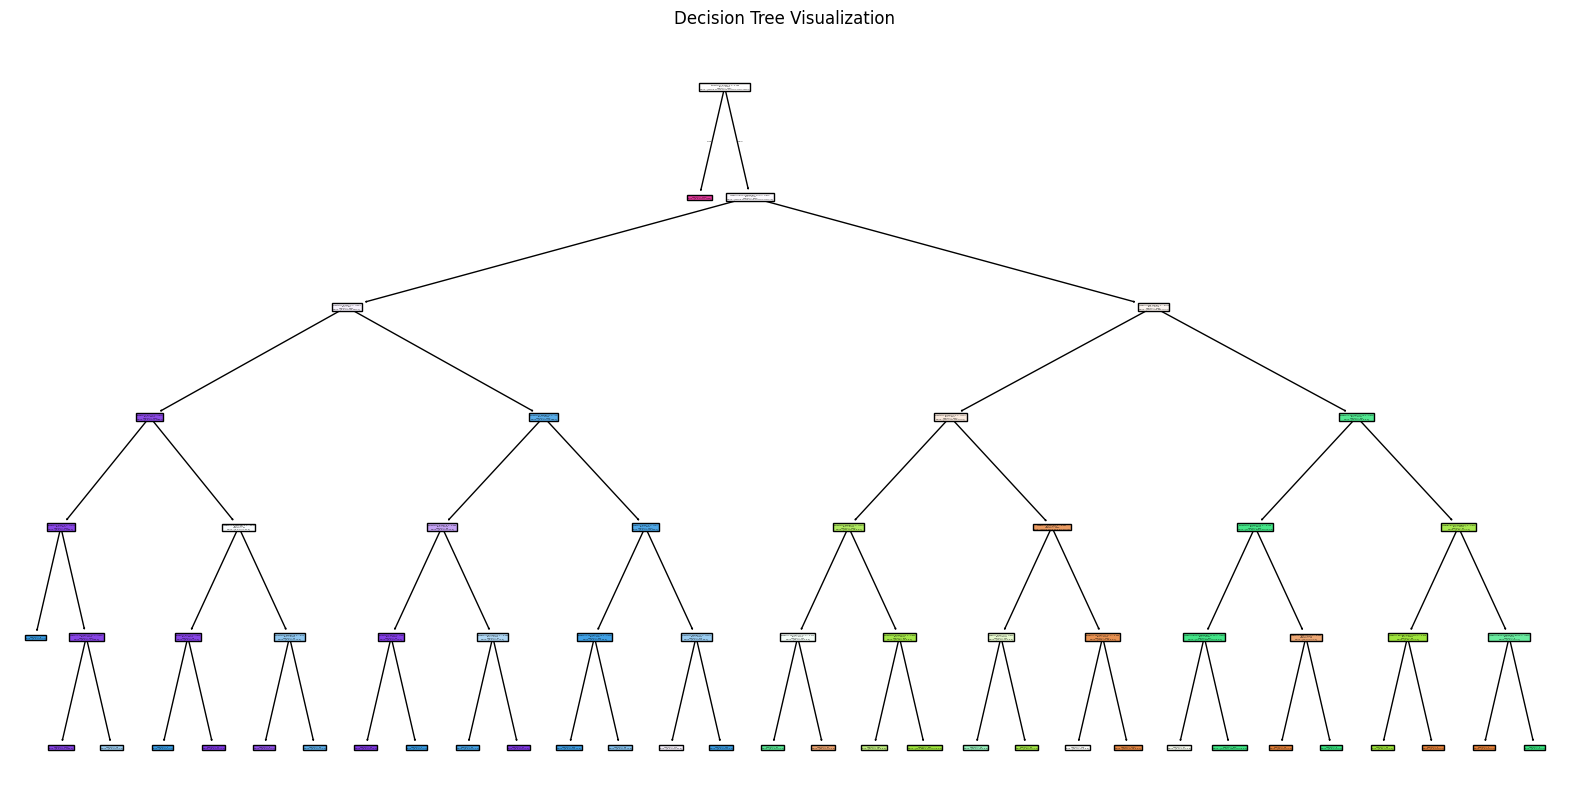

Accuracy: 0.8500
Recall: 0.8500
Precision: 0.8558

Confusion Matrix:

     1    2    3    4    5    6
1  459   23   14    0    0    0
2   85  359   27    0    0    0
3   16   97  307    0    0    0
4    0    0    0  351  140    0
5    0    0    0   40  492    0
6    0    0    0    0    0  537


Tree of Depth : 7


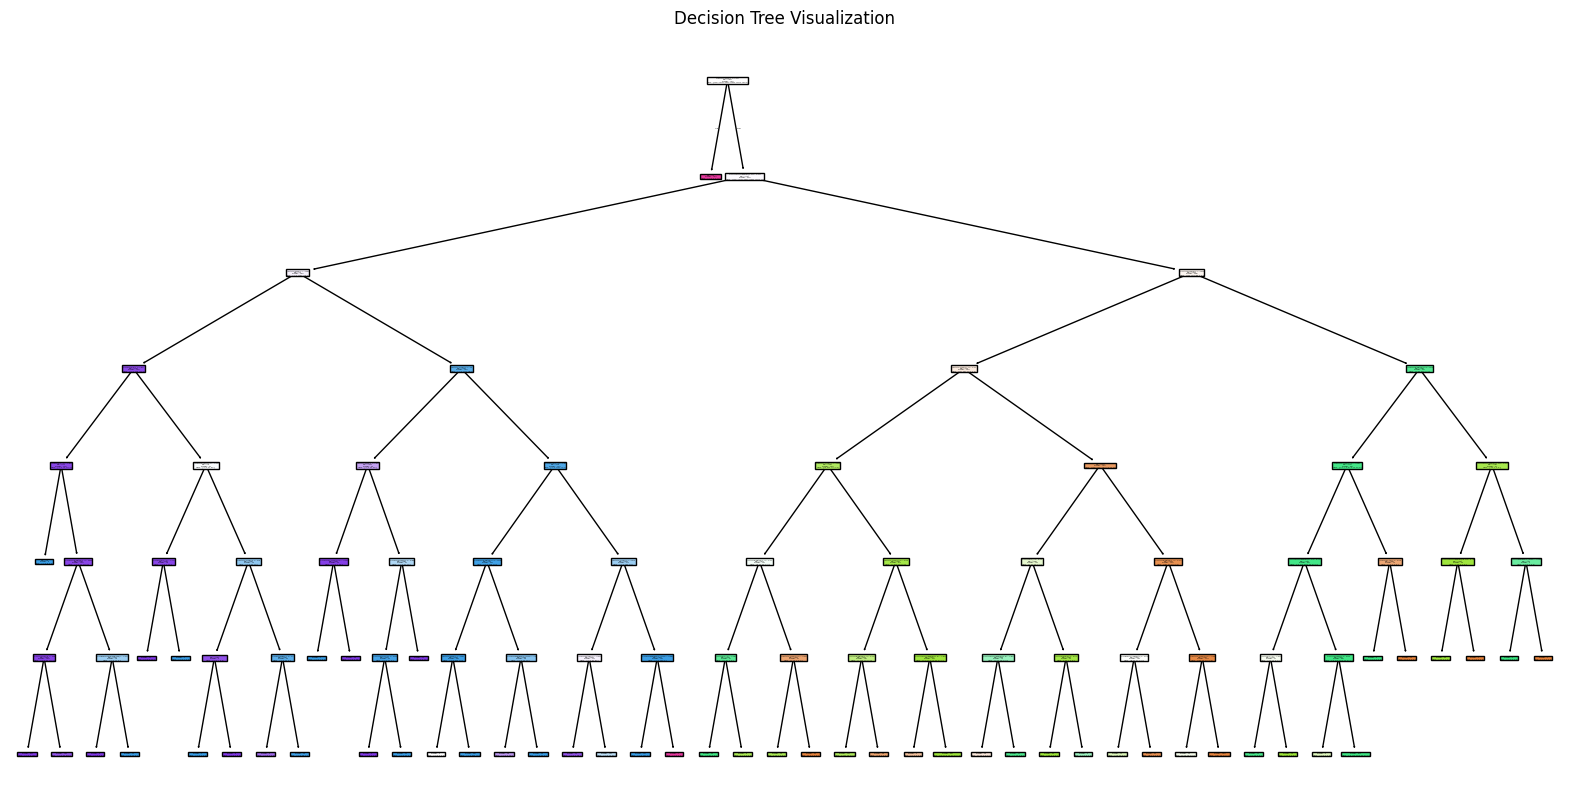

Accuracy: 0.8341
Recall: 0.8341
Precision: 0.8375

Confusion Matrix:

     1    2    3    4    5    6
1  465   20   11    0    0    0
2  127  319   25    0    0    0
3   22   90  308    0    0    0
4    0    0    0  382  109    0
5    0    0    0   85  447    0
6    0    0    0    0    0  537


Tree of Depth : 8


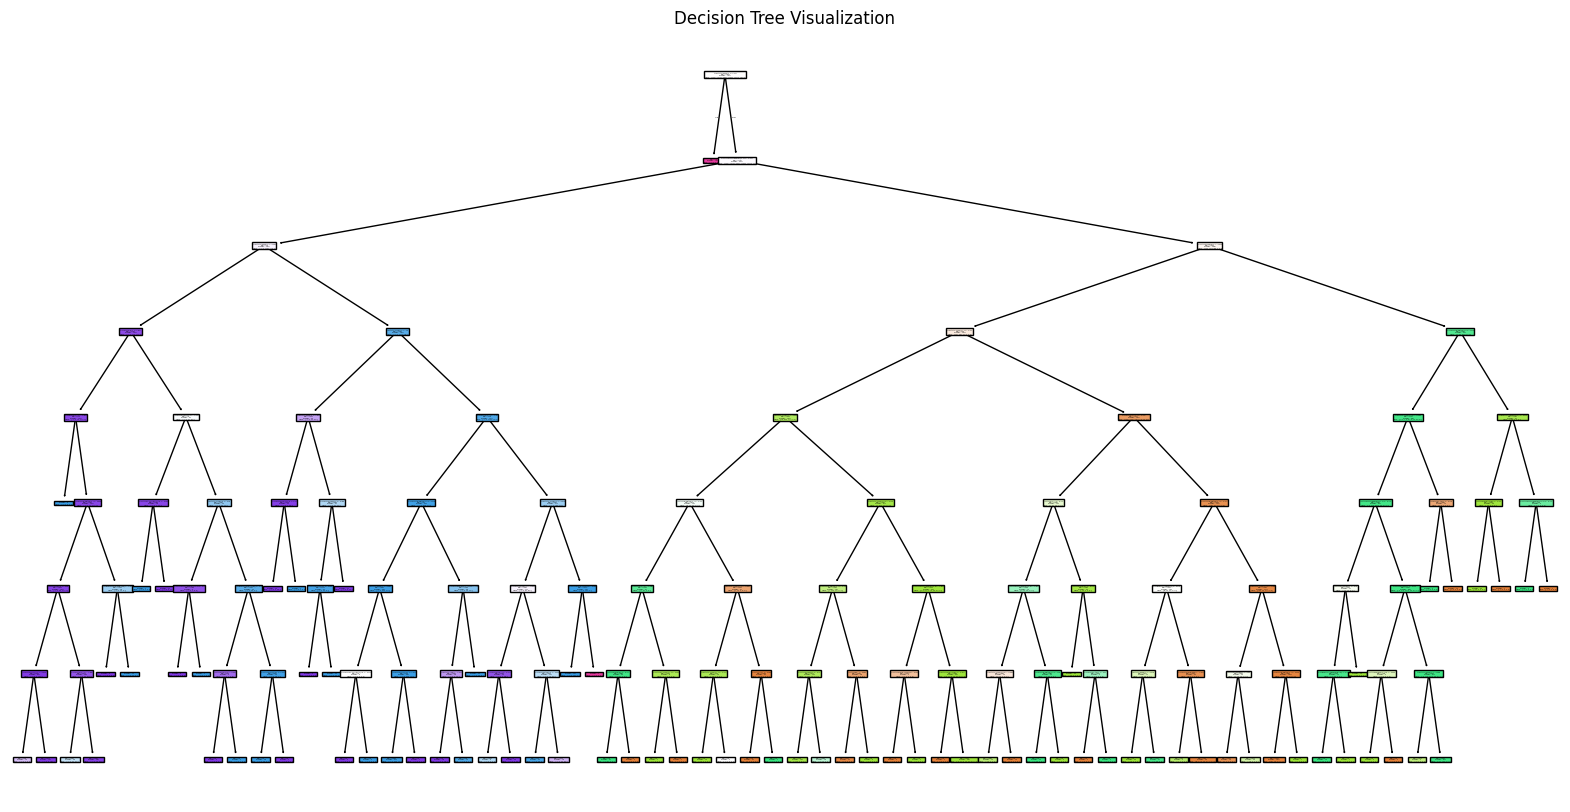

Accuracy: 0.8616
Recall: 0.8616
Precision: 0.8637

Confusion Matrix:

     1    2    3    4    5    6
1  466   12   18    0    0    0
2   89  356   26    0    0    0
3   21   68  331    0    0    0
4    0    0    0  378  113    0
5    0    0    0   60  471    1
6    0    0    0    0    0  537




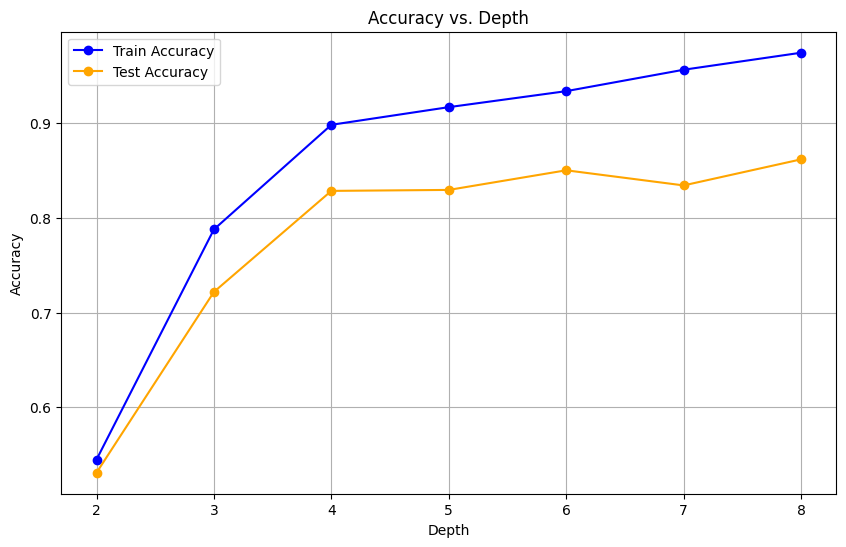

In [12]:
acc_test3 =[]
acc_train3 = []
depth = []
maxacc = -1
maxaccfeature = 0
for i in range(2,9):
    print("Tree of Depth :",i)
    acc_test_point,acc_train_point,cm = decision_tree_features(depth = i)
    if acc_test_point >maxacc:
        maxacc = acc_test_point
        maxaccfeature = cm
    print()
    print()
    acc_test3.append(acc_test_point)
    depth.append(i)
    acc_train3.append(acc_train_point)

accuracy_dataframe = pd.DataFrame({"Depth":depth,"Train Accuracy":acc_train3,"Test Accuracy":acc_test3})

bias_variance_plotter(accuracy_dataframe)

Note that the test accuracy of the above graph decreases when plotted to larger depths then saturates (mostly after 15)

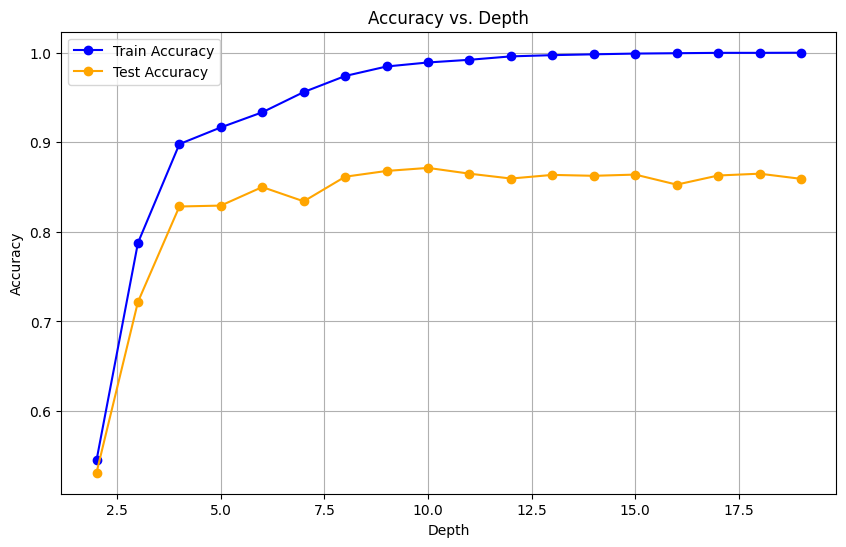

In [13]:
acc_testz =[]
acc_trainz = []
depth = []
for i in range(2,20):
    acc_test_point,acc_train_point,cm = decision_tree_features(depth = i,cond=False)
    print()
    print()
    acc_testz.append(acc_test_point)-
    depth.append(i)
    acc_trainz.append(acc_train_point)

accuracy_dataframe = pd.DataFrame({"Depth":depth,"Train Accuracy":acc_trainz,"Test Accuracy":acc_testz})

bias_variance_plotter(accuracy_dataframe)

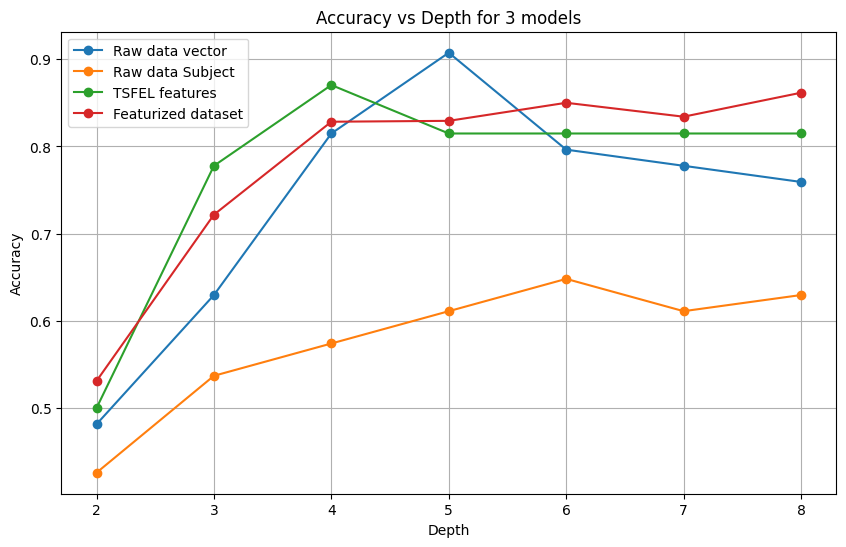

In [14]:
x = [2,3,4,5,6,7,8]
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs Depth for 3 models")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.plot(x,acc_test,label = "Raw data vector",marker = "o")
plt.plot(x,acc_test1,label = "Raw data Subject",marker = "o")
plt.plot(x,acc_test2,label = "TSFEL features",marker = "o")
plt.plot(x,acc_test3,label = "Featurized dataset",marker = "o")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
accuracies = []
for i in range(len(maxaccraw1)):
    true_positives = maxaccraw1[i][i]
    total_predictions = sum(maxaccraw1[i])
    accuracy = true_positives / total_predictions
    accuracies.append((i + 1, accuracy))

sorted_accuracies = sorted(accuracies, key=lambda x: x[1], reverse=True)
for activity, accuracy in sorted_accuracies:
    print(f"Activity {activity}: {np.round(accuracy,2)}")

Activity 4: 1.0
Activity 6: 1.0
Activity 5: 0.89
Activity 2: 0.67
Activity 1: 0.22
Activity 3: 0.11


In [16]:
accuracies = []
for i in range(len(maxaccraw)):
    true_positives = maxaccraw[i][i]
    total_predictions = sum(maxaccraw[i])
    accuracy = true_positives / total_predictions
    accuracies.append((i + 1, accuracy))

sorted_accuracies = sorted(accuracies, key=lambda x: x[1], reverse=True)
for activity, accuracy in sorted_accuracies:
    print(f"Activity {activity}: {np.round(accuracy,2)}")

Activity 5: 1.0
Activity 6: 1.0
Activity 1: 0.89
Activity 3: 0.89
Activity 4: 0.89
Activity 2: 0.78


In [23]:
accuracies = []
for i in range(len(maxacctsfel)):
    true_positives = maxacctsfel[i][i]
    total_predictions = sum(maxacctsfel[i])
    accuracy = true_positives / total_predictions
    accuracies.append((i + 1, accuracy))

sorted_accuracies = sorted(accuracies, key=lambda x: x[1], reverse=True)
for activity, accuracy in sorted_accuracies:
    print(f"Activity {activity}: {np.round(accuracy,2)}")

Activity 5: 1.0
Activity 6: 1.0
Activity 2: 0.89
Activity 1: 0.78
Activity 3: 0.78
Activity 4: 0.78


In [18]:
accuracies = []
for i in range(len(maxaccfeature)):
    true_positives = maxaccfeature[i][i]
    total_predictions = sum(maxaccfeature[i])
    accuracy = true_positives / total_predictions
    accuracies.append((i + 1, accuracy))

sorted_accuracies = sorted(accuracies, key=lambda x: x[1], reverse=True)
for activity, accuracy in sorted_accuracies:
    print(f"Activity {activity}: {np.round(accuracy,2)}")

Activity 6: 1.0
Activity 1: 0.94
Activity 5: 0.89
Activity 3: 0.79
Activity 4: 0.77
Activity 2: 0.76


From the above accuracies, we can see that in general **Activity 5** (Standing), **Activity 6** (Laying) and **Activity 1** (Walking) are classified pretty accurately. There is difficulty in classifying **Activity 2** (Walking Upward), **Activity 3** (Walking Downward) and **Activity 4** (Sitting)

In [19]:
print(maxaccraw1)

[[2 3 1 3 0 0]
 [1 6 1 0 1 0]
 [5 2 1 1 0 0]
 [0 0 0 9 0 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]


In [20]:
print(maxaccraw)

[[8 1 0 0 0 0]
 [2 7 0 0 0 0]
 [0 1 8 0 0 0]
 [1 0 0 8 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


In [21]:
print(maxacctsfel)

[[7 1 1 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 7 2 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


In [22]:
print(maxaccfeature)

[[466  12  18   0   0   0]
 [ 89 356  26   0   0   0]
 [ 21  68 331   0   0   0]
 [  0   0   0 378 113   0]
 [  0   0   0  60 471   1]
 [  0   0   0   0   0 537]]


From the above Confusion matrices (From Raw data, TSFEL features and Featured dataset) We can say that There is very frequent misclassification of walking upward as walking downward or just walking.<br>

Similarly walking downward is frequently misclassification as walking upward or walking, which is why there is less accuracy in predicting them. <br>

Sitting (activity 4) is frequently misclassified as standing (and vice versa but to a lower extent) due to acceleration being very similar in the same direction